<img src="../images/headers/nb_4.svg"  width="1080" height="220">

The objective of this notebook is to apply artificial neural network models to the
tabular data used in notebook 3.

First, a simple dense nn will be trained. The task will be treated as classification.
This means, that the model will ignore that we have ordered categories.
Second, a dense nn will be trained using an ordinal layer, an ordinal loss function and
ordinal metrics provided by the coral_ordinal package.

The models will be compared with regard to their accuracy.


# Import Packages and Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import coral_ordinal as coral
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from roaf import visualization, parameterization

In [2]:
plt.style.use("dark_background")
plt.set_cmap("Dark2")
sns.set_palette("Dark2")

<Figure size 640x480 with 0 Axes>

In [3]:
FAST_EXECUTION = False
N_EPOCHS = None
REDUCTION_FACTOR = 1

In [4]:
TRAIN_FILENAME = "Xy_train"
TEST_FILENAME = "Xy_test"

if FAST_EXECUTION:
    TRAIN_FILENAME = "TESTING_" + TRAIN_FILENAME
    TEST_FILENAME = "TESTING_" + TEST_FILENAME

train = pd.read_parquet("../data/processed/" + TRAIN_FILENAME + ".parquet")
test = pd.read_parquet("../data/processed/" + TEST_FILENAME + ".parquet")

In [5]:
X_train = train.drop(columns="severity")
y_train = train["severity"]
X_test = test.drop(columns="severity")
y_test = test["severity"]

# ANN Models with Keras

In [6]:
models_df = pd.DataFrame(  # pylint: disable=C0103
    columns=["model", "history", "i_color", "metric"]
).rename_axis(index="model_name")

N_EPOCHS, REDUCTION_FACTOR = parameterization.set_parameter(
    N_EPOCHS,
    std_value=20,
    fast_value=2,
    fast_execution=FAST_EXECUTION,
    reduction_factor=REDUCTION_FACTOR,
)

## Simple Dense Layer Network Classifier

In [7]:
MODEL_ID = "ann"
DROPOUT_RATE = 0.3
models_df.loc[MODEL_ID, "model"] = keras.Sequential(
    [
        keras.layers.Dense(
            units=32, activation="gelu", input_shape=(X_train.shape[1],)
        ),
        keras.layers.Dropout(rate=DROPOUT_RATE),
        keras.layers.Dense(units=3, activation="softmax"),
    ],
    name="Dense_ANN",
)

# get index fo
models_df.loc[MODEL_ID, "model"].compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", coral.MeanAbsoluteErrorLabels()],
)

reduce_lr_callback = keras.callbacks.ReduceLROnPlateau(
    factor=0.75, patience=6, cooldown=10, min_lr=0.0001
)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)
callbacks = [reduce_lr_callback, early_stopping]

In [8]:
models_df.loc[MODEL_ID, "history"] = models_df.loc[MODEL_ID, "model"].fit(
    X_train, y_train, epochs=N_EPOCHS, validation_split=0.1, callbacks=callbacks
)

Epoch 1/20


  1/641 [..............................] - ETA: 12:10 - loss: 1.3687 - accuracy: 0.4375 - mean_absolute_error_labels: 1.9062

 13/641 [..............................] - ETA: 2s - loss: 1.4710 - accuracy: 0.3149 - mean_absolute_error_labels: 2.0601   

 26/641 [>.............................] - ETA: 2s - loss: 1.4455 - accuracy: 0.3137 - mean_absolute_error_labels: 2.0469

 39/641 [>.............................] - ETA: 2s - loss: 1.4276 - accuracy: 0.3221 - mean_absolute_error_labels: 2.0176

 56/641 [=>............................] - ETA: 2s - loss: 1.3788 - accuracy: 0.3454 - mean_absolute_error_labels: 2.0229

 76/641 [==>...........................] - ETA: 1s - loss: 1.3202 - accuracy: 0.3729 - mean_absolute_error_labels: 2.0350

 97/641 [===>..........................] - ETA: 1s - loss: 1.2923 - accuracy: 0.3805 - mean_absolute_error_labels: 2.0425

117/641 [====>.........................] - ETA: 1s - loss: 1.2604 - accuracy: 0.3964 - mean_absolute_error_labels: 2.0411

137/641 [=====>........................] - ETA: 1s - loss: 1.2341 - accuracy: 0.4085 - mean_absolute_error_labels: 2.0347

159/641 [======>.......................] - ETA: 1s - loss: 1.2094 - accuracy: 0.4182 - mean_absolute_error_labels: 2.0369

180/641 [=======>......................] - ETA: 1s - loss: 1.1910 - accuracy: 0.4245 - mean_absolute_error_labels: 2.0281

202/641 [========>.....................] - ETA: 1s - loss: 1.1715 - accuracy: 0.4316 - mean_absolute_error_labels: 2.0217

222/641 [=========>....................] - ETA: 1s - loss: 1.1586 - accuracy: 0.4362 - mean_absolute_error_labels: 2.0200

245/641 [==========>...................] - ETA: 1s - loss: 1.1491 - accuracy: 0.4403 - mean_absolute_error_labels: 2.0152

264/641 [===========>..................] - ETA: 1s - loss: 1.1415 - accuracy: 0.4440 - mean_absolute_error_labels: 2.0153

287/641 [============>.................] - ETA: 0s - loss: 1.1364 - accuracy: 0.4475 - mean_absolute_error_labels: 2.0109

308/641 [=============>................] - ETA: 0s - loss: 1.1253 - accuracy: 0.4520 - mean_absolute_error_labels: 2.0087

330/641 [==============>...............] - ETA: 0s - loss: 1.1170 - accuracy: 0.4566 - mean_absolute_error_labels: 2.0098

351/641 [===============>..............] - ETA: 0s - loss: 1.1087 - accuracy: 0.4609 - mean_absolute_error_labels: 2.0045

370/641 [================>.............] - ETA: 0s - loss: 1.1030 - accuracy: 0.4633 - mean_absolute_error_labels: 2.0037

391/641 [=================>............] - ETA: 0s - loss: 1.0960 - accuracy: 0.4656 - mean_absolute_error_labels: 2.0052

413/641 [==================>...........] - ETA: 0s - loss: 1.0923 - accuracy: 0.4678 - mean_absolute_error_labels: 2.0047

431/641 [===================>..........] - ETA: 0s - loss: 1.0884 - accuracy: 0.4690 - mean_absolute_error_labels: 2.0041

453/641 [====================>.........] - ETA: 0s - loss: 1.0845 - accuracy: 0.4698 - mean_absolute_error_labels: 2.0031

475/641 [=====================>........] - ETA: 0s - loss: 1.0801 - accuracy: 0.4705 - mean_absolute_error_labels: 2.0059

496/641 [======================>.......] - ETA: 0s - loss: 1.0742 - accuracy: 0.4740 - mean_absolute_error_labels: 2.0041

518/641 [=======================>......] - ETA: 0s - loss: 1.0701 - accuracy: 0.4753 - mean_absolute_error_labels: 2.0033

542/641 [========================>.....] - ETA: 0s - loss: 1.0656 - accuracy: 0.4772 - mean_absolute_error_labels: 2.0042

566/641 [=========================>....] - ETA: 0s - loss: 1.0615 - accuracy: 0.4797 - mean_absolute_error_labels: 2.0033

588/641 [==========================>...] - ETA: 0s - loss: 1.0576 - accuracy: 0.4808 - mean_absolute_error_labels: 2.0036

611/641 [===========================>..] - ETA: 0s - loss: 1.0542 - accuracy: 0.4823 - mean_absolute_error_labels: 2.0035

631/641 [============================>.] - ETA: 0s - loss: 1.0521 - accuracy: 0.4833 - mean_absolute_error_labels: 2.0034

641/641 [==============================] - 3s 3ms/step - loss: 1.0510 - accuracy: 0.4835 - mean_absolute_error_labels: 2.0030 - val_loss: 0.9196 - val_accuracy: 0.5447 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 2/20


  1/641 [..............................] - ETA: 1s - loss: 0.7290 - accuracy: 0.6562 - mean_absolute_error_labels: 1.7500

 23/641 [>.............................] - ETA: 1s - loss: 0.8973 - accuracy: 0.5639 - mean_absolute_error_labels: 1.9864

 44/641 [=>............................] - ETA: 1s - loss: 0.9185 - accuracy: 0.5405 - mean_absolute_error_labels: 2.0007

 68/641 [==>...........................] - ETA: 1s - loss: 0.9444 - accuracy: 0.5239 - mean_absolute_error_labels: 2.0032

 90/641 [===>..........................] - ETA: 1s - loss: 0.9508 - accuracy: 0.5260 - mean_absolute_error_labels: 2.0045

112/641 [====>.........................] - ETA: 1s - loss: 0.9473 - accuracy: 0.5299 - mean_absolute_error_labels: 1.9964

133/641 [=====>........................] - ETA: 1s - loss: 0.9490 - accuracy: 0.5270 - mean_absolute_error_labels: 1.9984

156/641 [======>.......................] - ETA: 1s - loss: 0.9511 - accuracy: 0.5288 - mean_absolute_error_labels: 2.0076

176/641 [=======>......................] - ETA: 1s - loss: 0.9484 - accuracy: 0.5332 - mean_absolute_error_labels: 2.0075

197/641 [========>.....................] - ETA: 1s - loss: 0.9478 - accuracy: 0.5327 - mean_absolute_error_labels: 2.0032

221/641 [=========>....................] - ETA: 0s - loss: 0.9490 - accuracy: 0.5322 - mean_absolute_error_labels: 2.0051

242/641 [==========>...................] - ETA: 0s - loss: 0.9491 - accuracy: 0.5316 - mean_absolute_error_labels: 2.0026

262/641 [===========>..................] - ETA: 0s - loss: 0.9476 - accuracy: 0.5307 - mean_absolute_error_labels: 2.0021

285/641 [============>.................] - ETA: 0s - loss: 0.9472 - accuracy: 0.5311 - mean_absolute_error_labels: 2.0062

309/641 [=============>................] - ETA: 0s - loss: 0.9491 - accuracy: 0.5293 - mean_absolute_error_labels: 2.0039

332/641 [==============>...............] - ETA: 0s - loss: 0.9465 - accuracy: 0.5309 - mean_absolute_error_labels: 2.0023

352/641 [===============>..............] - ETA: 0s - loss: 0.9443 - accuracy: 0.5306 - mean_absolute_error_labels: 1.9997

374/641 [================>.............] - ETA: 0s - loss: 0.9443 - accuracy: 0.5314 - mean_absolute_error_labels: 1.9991

394/641 [=================>............] - ETA: 0s - loss: 0.9447 - accuracy: 0.5318 - mean_absolute_error_labels: 1.9976

412/641 [==================>...........] - ETA: 0s - loss: 0.9455 - accuracy: 0.5307 - mean_absolute_error_labels: 1.9980

433/641 [===================>..........] - ETA: 0s - loss: 0.9438 - accuracy: 0.5323 - mean_absolute_error_labels: 1.9986

456/641 [====================>.........] - ETA: 0s - loss: 0.9429 - accuracy: 0.5324 - mean_absolute_error_labels: 1.9985

479/641 [=====================>........] - ETA: 0s - loss: 0.9417 - accuracy: 0.5329 - mean_absolute_error_labels: 1.9991

503/641 [======================>.......] - ETA: 0s - loss: 0.9404 - accuracy: 0.5326 - mean_absolute_error_labels: 2.0006

524/641 [=======================>......] - ETA: 0s - loss: 0.9385 - accuracy: 0.5328 - mean_absolute_error_labels: 2.0010

547/641 [========================>.....] - ETA: 0s - loss: 0.9392 - accuracy: 0.5331 - mean_absolute_error_labels: 1.9999

569/641 [=========================>....] - ETA: 0s - loss: 0.9380 - accuracy: 0.5333 - mean_absolute_error_labels: 2.0020

591/641 [==========================>...] - ETA: 0s - loss: 0.9381 - accuracy: 0.5336 - mean_absolute_error_labels: 2.0020

613/641 [===========================>..] - ETA: 0s - loss: 0.9388 - accuracy: 0.5331 - mean_absolute_error_labels: 2.0022

635/641 [============================>.] - ETA: 0s - loss: 0.9390 - accuracy: 0.5327 - mean_absolute_error_labels: 2.0027

641/641 [==============================] - 2s 3ms/step - loss: 0.9390 - accuracy: 0.5326 - mean_absolute_error_labels: 2.0030 - val_loss: 0.9082 - val_accuracy: 0.5496 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 3/20


  1/641 [..............................] - ETA: 2s - loss: 0.9768 - accuracy: 0.5000 - mean_absolute_error_labels: 1.7188

 22/641 [>.............................] - ETA: 1s - loss: 0.9283 - accuracy: 0.5312 - mean_absolute_error_labels: 1.9943

 42/641 [>.............................] - ETA: 1s - loss: 0.9199 - accuracy: 0.5469 - mean_absolute_error_labels: 2.0015

 63/641 [=>............................] - ETA: 1s - loss: 0.9115 - accuracy: 0.5476 - mean_absolute_error_labels: 1.9831

 84/641 [==>...........................] - ETA: 1s - loss: 0.9169 - accuracy: 0.5350 - mean_absolute_error_labels: 1.9792

104/641 [===>..........................] - ETA: 1s - loss: 0.9167 - accuracy: 0.5388 - mean_absolute_error_labels: 1.9850

124/641 [====>.........................] - ETA: 1s - loss: 0.9181 - accuracy: 0.5393 - mean_absolute_error_labels: 1.9814

143/641 [=====>........................] - ETA: 1s - loss: 0.9157 - accuracy: 0.5431 - mean_absolute_error_labels: 1.9836

162/641 [======>.......................] - ETA: 1s - loss: 0.9162 - accuracy: 0.5409 - mean_absolute_error_labels: 1.9925

182/641 [=======>......................] - ETA: 1s - loss: 0.9152 - accuracy: 0.5434 - mean_absolute_error_labels: 1.9911

202/641 [========>.....................] - ETA: 1s - loss: 0.9164 - accuracy: 0.5408 - mean_absolute_error_labels: 1.9913

223/641 [=========>....................] - ETA: 1s - loss: 0.9144 - accuracy: 0.5418 - mean_absolute_error_labels: 1.9952

243/641 [==========>...................] - ETA: 1s - loss: 0.9146 - accuracy: 0.5415 - mean_absolute_error_labels: 1.9959

264/641 [===========>..................] - ETA: 0s - loss: 0.9174 - accuracy: 0.5407 - mean_absolute_error_labels: 1.9989

284/641 [============>.................] - ETA: 0s - loss: 0.9185 - accuracy: 0.5398 - mean_absolute_error_labels: 1.9982

305/641 [=============>................] - ETA: 0s - loss: 0.9193 - accuracy: 0.5400 - mean_absolute_error_labels: 1.9942

325/641 [==============>...............] - ETA: 0s - loss: 0.9196 - accuracy: 0.5405 - mean_absolute_error_labels: 1.9922

346/641 [===============>..............] - ETA: 0s - loss: 0.9197 - accuracy: 0.5386 - mean_absolute_error_labels: 1.9955

365/641 [================>.............] - ETA: 0s - loss: 0.9182 - accuracy: 0.5405 - mean_absolute_error_labels: 1.9966

385/641 [=================>............] - ETA: 0s - loss: 0.9185 - accuracy: 0.5402 - mean_absolute_error_labels: 1.9988

405/641 [=================>............] - ETA: 0s - loss: 0.9180 - accuracy: 0.5413 - mean_absolute_error_labels: 2.0008

424/641 [==================>...........] - ETA: 0s - loss: 0.9184 - accuracy: 0.5409 - mean_absolute_error_labels: 1.9996

444/641 [===================>..........] - ETA: 0s - loss: 0.9186 - accuracy: 0.5405 - mean_absolute_error_labels: 2.0002

464/641 [====================>.........] - ETA: 0s - loss: 0.9215 - accuracy: 0.5386 - mean_absolute_error_labels: 2.0007

484/641 [=====================>........] - ETA: 0s - loss: 0.9225 - accuracy: 0.5387 - mean_absolute_error_labels: 2.0018

501/641 [======================>.......] - ETA: 0s - loss: 0.9220 - accuracy: 0.5397 - mean_absolute_error_labels: 2.0026

519/641 [=======================>......] - ETA: 0s - loss: 0.9220 - accuracy: 0.5408 - mean_absolute_error_labels: 2.0019

541/641 [========================>.....] - ETA: 0s - loss: 0.9210 - accuracy: 0.5418 - mean_absolute_error_labels: 2.0018

560/641 [=========================>....] - ETA: 0s - loss: 0.9201 - accuracy: 0.5423 - mean_absolute_error_labels: 2.0031

581/641 [==========================>...] - ETA: 0s - loss: 0.9194 - accuracy: 0.5430 - mean_absolute_error_labels: 2.0035

601/641 [===========================>..] - ETA: 0s - loss: 0.9189 - accuracy: 0.5431 - mean_absolute_error_labels: 2.0043

620/641 [============================>.] - ETA: 0s - loss: 0.9183 - accuracy: 0.5437 - mean_absolute_error_labels: 2.0029

640/641 [============================>.] - ETA: 0s - loss: 0.9177 - accuracy: 0.5436 - mean_absolute_error_labels: 2.0032

641/641 [==============================] - 2s 3ms/step - loss: 0.9178 - accuracy: 0.5435 - mean_absolute_error_labels: 2.0030 - val_loss: 0.9017 - val_accuracy: 0.5535 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 4/20


  1/641 [..............................] - ETA: 2s - loss: 0.8197 - accuracy: 0.6562 - mean_absolute_error_labels: 2.0938

 20/641 [..............................] - ETA: 1s - loss: 0.8880 - accuracy: 0.5719 - mean_absolute_error_labels: 1.9359

 39/641 [>.............................] - ETA: 1s - loss: 0.8982 - accuracy: 0.5633 - mean_absolute_error_labels: 1.9920

 60/641 [=>............................] - ETA: 1s - loss: 0.8924 - accuracy: 0.5609 - mean_absolute_error_labels: 1.9937

 80/641 [==>...........................] - ETA: 1s - loss: 0.8847 - accuracy: 0.5656 - mean_absolute_error_labels: 1.9766

 98/641 [===>..........................] - ETA: 1s - loss: 0.8905 - accuracy: 0.5679 - mean_absolute_error_labels: 1.9879

118/641 [====>.........................] - ETA: 1s - loss: 0.8878 - accuracy: 0.5667 - mean_absolute_error_labels: 1.9886

140/641 [=====>........................] - ETA: 1s - loss: 0.8882 - accuracy: 0.5661 - mean_absolute_error_labels: 1.9888

161/641 [======>.......................] - ETA: 1s - loss: 0.8967 - accuracy: 0.5611 - mean_absolute_error_labels: 1.9854

181/641 [=======>......................] - ETA: 1s - loss: 0.9014 - accuracy: 0.5571 - mean_absolute_error_labels: 1.9910

201/641 [========>.....................] - ETA: 1s - loss: 0.9012 - accuracy: 0.5560 - mean_absolute_error_labels: 1.9946

223/641 [=========>....................] - ETA: 1s - loss: 0.9010 - accuracy: 0.5559 - mean_absolute_error_labels: 1.9989

244/641 [==========>...................] - ETA: 1s - loss: 0.9038 - accuracy: 0.5534 - mean_absolute_error_labels: 1.9994

267/641 [===========>..................] - ETA: 0s - loss: 0.9071 - accuracy: 0.5533 - mean_absolute_error_labels: 1.9959

291/641 [============>.................] - ETA: 0s - loss: 0.9078 - accuracy: 0.5534 - mean_absolute_error_labels: 1.9981

315/641 [=============>................] - ETA: 0s - loss: 0.9087 - accuracy: 0.5532 - mean_absolute_error_labels: 2.0011

337/641 [==============>...............] - ETA: 0s - loss: 0.9099 - accuracy: 0.5518 - mean_absolute_error_labels: 2.0037

359/641 [===============>..............] - ETA: 0s - loss: 0.9082 - accuracy: 0.5534 - mean_absolute_error_labels: 2.0074

382/641 [================>.............] - ETA: 0s - loss: 0.9083 - accuracy: 0.5521 - mean_absolute_error_labels: 2.0097

405/641 [=================>............] - ETA: 0s - loss: 0.9091 - accuracy: 0.5517 - mean_absolute_error_labels: 2.0096

427/641 [==================>...........] - ETA: 0s - loss: 0.9080 - accuracy: 0.5515 - mean_absolute_error_labels: 2.0084

448/641 [===================>..........] - ETA: 0s - loss: 0.9073 - accuracy: 0.5523 - mean_absolute_error_labels: 2.0072

470/641 [====================>.........] - ETA: 0s - loss: 0.9069 - accuracy: 0.5521 - mean_absolute_error_labels: 2.0057

491/641 [=====================>........] - ETA: 0s - loss: 0.9068 - accuracy: 0.5529 - mean_absolute_error_labels: 2.0052

511/641 [======================>.......] - ETA: 0s - loss: 0.9076 - accuracy: 0.5522 - mean_absolute_error_labels: 2.0056

534/641 [=======================>......] - ETA: 0s - loss: 0.9075 - accuracy: 0.5524 - mean_absolute_error_labels: 2.0048

557/641 [=========================>....] - ETA: 0s - loss: 0.9075 - accuracy: 0.5519 - mean_absolute_error_labels: 2.0064

579/641 [==========================>...] - ETA: 0s - loss: 0.9078 - accuracy: 0.5512 - mean_absolute_error_labels: 2.0053

602/641 [===========================>..] - ETA: 0s - loss: 0.9068 - accuracy: 0.5519 - mean_absolute_error_labels: 2.0048

625/641 [============================>.] - ETA: 0s - loss: 0.9066 - accuracy: 0.5516 - mean_absolute_error_labels: 2.0040

641/641 [==============================] - 2s 3ms/step - loss: 0.9071 - accuracy: 0.5518 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8965 - val_accuracy: 0.5614 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 5/20


  1/641 [..............................] - ETA: 2s - loss: 0.8861 - accuracy: 0.5625 - mean_absolute_error_labels: 2.0000

 23/641 [>.............................] - ETA: 1s - loss: 0.8867 - accuracy: 0.5435 - mean_absolute_error_labels: 2.0177

 47/641 [=>............................] - ETA: 1s - loss: 0.9082 - accuracy: 0.5445 - mean_absolute_error_labels: 2.0080

 70/641 [==>...........................] - ETA: 1s - loss: 0.9091 - accuracy: 0.5451 - mean_absolute_error_labels: 2.0183

 92/641 [===>..........................] - ETA: 1s - loss: 0.9098 - accuracy: 0.5479 - mean_absolute_error_labels: 2.0173

114/641 [====>.........................] - ETA: 1s - loss: 0.9071 - accuracy: 0.5491 - mean_absolute_error_labels: 2.0126

137/641 [=====>........................] - ETA: 1s - loss: 0.9062 - accuracy: 0.5547 - mean_absolute_error_labels: 2.0075

160/641 [======>.......................] - ETA: 1s - loss: 0.9051 - accuracy: 0.5557 - mean_absolute_error_labels: 2.0094

182/641 [=======>......................] - ETA: 1s - loss: 0.9051 - accuracy: 0.5560 - mean_absolute_error_labels: 2.0127

204/641 [========>.....................] - ETA: 0s - loss: 0.9031 - accuracy: 0.5585 - mean_absolute_error_labels: 2.0136

227/641 [=========>....................] - ETA: 0s - loss: 0.9002 - accuracy: 0.5591 - mean_absolute_error_labels: 2.0050

249/641 [==========>...................] - ETA: 0s - loss: 0.8998 - accuracy: 0.5592 - mean_absolute_error_labels: 2.0038

271/641 [===========>..................] - ETA: 0s - loss: 0.9018 - accuracy: 0.5577 - mean_absolute_error_labels: 2.0035

293/641 [============>.................] - ETA: 0s - loss: 0.9016 - accuracy: 0.5583 - mean_absolute_error_labels: 2.0001

315/641 [=============>................] - ETA: 0s - loss: 0.9039 - accuracy: 0.5570 - mean_absolute_error_labels: 2.0012

338/641 [==============>...............] - ETA: 0s - loss: 0.9053 - accuracy: 0.5557 - mean_absolute_error_labels: 2.0022

360/641 [===============>..............] - ETA: 0s - loss: 0.9038 - accuracy: 0.5549 - mean_absolute_error_labels: 2.0021

384/641 [================>.............] - ETA: 0s - loss: 0.9029 - accuracy: 0.5554 - mean_absolute_error_labels: 2.0035

407/641 [==================>...........] - ETA: 0s - loss: 0.9030 - accuracy: 0.5564 - mean_absolute_error_labels: 2.0026

430/641 [===================>..........] - ETA: 0s - loss: 0.9037 - accuracy: 0.5557 - mean_absolute_error_labels: 2.0008

453/641 [====================>.........] - ETA: 0s - loss: 0.9046 - accuracy: 0.5543 - mean_absolute_error_labels: 2.0017

474/641 [=====================>........] - ETA: 0s - loss: 0.9029 - accuracy: 0.5548 - mean_absolute_error_labels: 2.0010

496/641 [======================>.......] - ETA: 0s - loss: 0.9021 - accuracy: 0.5545 - mean_absolute_error_labels: 2.0009

518/641 [=======================>......] - ETA: 0s - loss: 0.9021 - accuracy: 0.5550 - mean_absolute_error_labels: 1.9997

540/641 [========================>.....] - ETA: 0s - loss: 0.9031 - accuracy: 0.5538 - mean_absolute_error_labels: 1.9997

562/641 [=========================>....] - ETA: 0s - loss: 0.9045 - accuracy: 0.5528 - mean_absolute_error_labels: 1.9992

584/641 [==========================>...] - ETA: 0s - loss: 0.9051 - accuracy: 0.5527 - mean_absolute_error_labels: 1.9999

605/641 [===========================>..] - ETA: 0s - loss: 0.9070 - accuracy: 0.5506 - mean_absolute_error_labels: 2.0019

628/641 [============================>.] - ETA: 0s - loss: 0.9066 - accuracy: 0.5506 - mean_absolute_error_labels: 2.0027

641/641 [==============================] - 2s 3ms/step - loss: 0.9062 - accuracy: 0.5509 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8974 - val_accuracy: 0.5526 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 6/20


  1/641 [..............................] - ETA: 2s - loss: 0.8198 - accuracy: 0.5625 - mean_absolute_error_labels: 2.0938

 23/641 [>.............................] - ETA: 1s - loss: 0.8757 - accuracy: 0.5516 - mean_absolute_error_labels: 2.0408

 46/641 [=>............................] - ETA: 1s - loss: 0.8835 - accuracy: 0.5557 - mean_absolute_error_labels: 2.0224

 68/641 [==>...........................] - ETA: 1s - loss: 0.8804 - accuracy: 0.5634 - mean_absolute_error_labels: 2.0285

 91/641 [===>..........................] - ETA: 1s - loss: 0.8933 - accuracy: 0.5560 - mean_absolute_error_labels: 2.0230

114/641 [====>.........................] - ETA: 1s - loss: 0.8928 - accuracy: 0.5581 - mean_absolute_error_labels: 2.0129

137/641 [=====>........................] - ETA: 1s - loss: 0.8932 - accuracy: 0.5609 - mean_absolute_error_labels: 2.0103

159/641 [======>.......................] - ETA: 1s - loss: 0.8959 - accuracy: 0.5568 - mean_absolute_error_labels: 2.0063

182/641 [=======>......................] - ETA: 1s - loss: 0.8940 - accuracy: 0.5570 - mean_absolute_error_labels: 2.0077

202/641 [========>.....................] - ETA: 1s - loss: 0.8940 - accuracy: 0.5572 - mean_absolute_error_labels: 2.0125

225/641 [=========>....................] - ETA: 0s - loss: 0.8926 - accuracy: 0.5589 - mean_absolute_error_labels: 2.0129

248/641 [==========>...................] - ETA: 0s - loss: 0.8908 - accuracy: 0.5593 - mean_absolute_error_labels: 2.0126

270/641 [===========>..................] - ETA: 0s - loss: 0.8945 - accuracy: 0.5574 - mean_absolute_error_labels: 2.0138

292/641 [============>.................] - ETA: 0s - loss: 0.8983 - accuracy: 0.5547 - mean_absolute_error_labels: 2.0134

312/641 [=============>................] - ETA: 0s - loss: 0.8974 - accuracy: 0.5536 - mean_absolute_error_labels: 2.0078

335/641 [==============>...............] - ETA: 0s - loss: 0.8977 - accuracy: 0.5544 - mean_absolute_error_labels: 2.0077

357/641 [===============>..............] - ETA: 0s - loss: 0.8962 - accuracy: 0.5554 - mean_absolute_error_labels: 2.0103

379/641 [================>.............] - ETA: 0s - loss: 0.8971 - accuracy: 0.5552 - mean_absolute_error_labels: 2.0102

401/641 [=================>............] - ETA: 0s - loss: 0.8991 - accuracy: 0.5548 - mean_absolute_error_labels: 2.0076

424/641 [==================>...........] - ETA: 0s - loss: 0.8990 - accuracy: 0.5543 - mean_absolute_error_labels: 2.0077

446/641 [===================>..........] - ETA: 0s - loss: 0.8990 - accuracy: 0.5535 - mean_absolute_error_labels: 2.0085

469/641 [====================>.........] - ETA: 0s - loss: 0.8988 - accuracy: 0.5532 - mean_absolute_error_labels: 2.0063

492/641 [======================>.......] - ETA: 0s - loss: 0.8978 - accuracy: 0.5540 - mean_absolute_error_labels: 2.0055

514/641 [=======================>......] - ETA: 0s - loss: 0.8984 - accuracy: 0.5544 - mean_absolute_error_labels: 2.0036

537/641 [========================>.....] - ETA: 0s - loss: 0.8989 - accuracy: 0.5542 - mean_absolute_error_labels: 2.0045

558/641 [=========================>....] - ETA: 0s - loss: 0.8986 - accuracy: 0.5554 - mean_absolute_error_labels: 2.0040

580/641 [==========================>...] - ETA: 0s - loss: 0.8978 - accuracy: 0.5557 - mean_absolute_error_labels: 2.0051

601/641 [===========================>..] - ETA: 0s - loss: 0.8987 - accuracy: 0.5551 - mean_absolute_error_labels: 2.0036

623/641 [============================>.] - ETA: 0s - loss: 0.8982 - accuracy: 0.5555 - mean_absolute_error_labels: 2.0037

641/641 [==============================] - 2s 3ms/step - loss: 0.8985 - accuracy: 0.5547 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8946 - val_accuracy: 0.5566 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 7/20


  1/641 [..............................] - ETA: 1s - loss: 0.8897 - accuracy: 0.4375 - mean_absolute_error_labels: 2.0312

 25/641 [>.............................] - ETA: 1s - loss: 0.8998 - accuracy: 0.5437 - mean_absolute_error_labels: 2.0125

 48/641 [=>............................] - ETA: 1s - loss: 0.8908 - accuracy: 0.5488 - mean_absolute_error_labels: 2.0163

 72/641 [==>...........................] - ETA: 1s - loss: 0.8943 - accuracy: 0.5564 - mean_absolute_error_labels: 2.0252

 95/641 [===>..........................] - ETA: 1s - loss: 0.8939 - accuracy: 0.5592 - mean_absolute_error_labels: 2.0332

117/641 [====>.........................] - ETA: 1s - loss: 0.8906 - accuracy: 0.5625 - mean_absolute_error_labels: 2.0275

139/641 [=====>........................] - ETA: 1s - loss: 0.8885 - accuracy: 0.5650 - mean_absolute_error_labels: 2.0171

162/641 [======>.......................] - ETA: 1s - loss: 0.8857 - accuracy: 0.5677 - mean_absolute_error_labels: 2.0141

184/641 [=======>......................] - ETA: 1s - loss: 0.8860 - accuracy: 0.5688 - mean_absolute_error_labels: 2.0080

208/641 [========>.....................] - ETA: 0s - loss: 0.8860 - accuracy: 0.5675 - mean_absolute_error_labels: 2.0029

230/641 [=========>....................] - ETA: 0s - loss: 0.8891 - accuracy: 0.5648 - mean_absolute_error_labels: 2.0026

253/641 [==========>...................] - ETA: 0s - loss: 0.8938 - accuracy: 0.5624 - mean_absolute_error_labels: 2.0032

274/641 [===========>..................] - ETA: 0s - loss: 0.8971 - accuracy: 0.5599 - mean_absolute_error_labels: 2.0032

296/641 [============>.................] - ETA: 0s - loss: 0.8965 - accuracy: 0.5594 - mean_absolute_error_labels: 2.0037

319/641 [=============>................] - ETA: 0s - loss: 0.8987 - accuracy: 0.5573 - mean_absolute_error_labels: 2.0063

340/641 [==============>...............] - ETA: 0s - loss: 0.8987 - accuracy: 0.5569 - mean_absolute_error_labels: 2.0040

363/641 [===============>..............] - ETA: 0s - loss: 0.8996 - accuracy: 0.5572 - mean_absolute_error_labels: 1.9995

386/641 [=================>............] - ETA: 0s - loss: 0.8980 - accuracy: 0.5578 - mean_absolute_error_labels: 2.0015

406/641 [==================>...........] - ETA: 0s - loss: 0.8980 - accuracy: 0.5567 - mean_absolute_error_labels: 2.0009

428/641 [===================>..........] - ETA: 0s - loss: 0.8987 - accuracy: 0.5544 - mean_absolute_error_labels: 2.0009

450/641 [====================>.........] - ETA: 0s - loss: 0.8970 - accuracy: 0.5549 - mean_absolute_error_labels: 2.0011

474/641 [=====================>........] - ETA: 0s - loss: 0.8964 - accuracy: 0.5555 - mean_absolute_error_labels: 1.9998

497/641 [======================>.......] - ETA: 0s - loss: 0.8954 - accuracy: 0.5565 - mean_absolute_error_labels: 2.0020

518/641 [=======================>......] - ETA: 0s - loss: 0.8938 - accuracy: 0.5584 - mean_absolute_error_labels: 2.0026

539/641 [========================>.....] - ETA: 0s - loss: 0.8921 - accuracy: 0.5597 - mean_absolute_error_labels: 2.0006

562/641 [=========================>....] - ETA: 0s - loss: 0.8929 - accuracy: 0.5588 - mean_absolute_error_labels: 2.0025

583/641 [==========================>...] - ETA: 0s - loss: 0.8941 - accuracy: 0.5578 - mean_absolute_error_labels: 2.0030

605/641 [===========================>..] - ETA: 0s - loss: 0.8944 - accuracy: 0.5580 - mean_absolute_error_labels: 2.0024

627/641 [============================>.] - ETA: 0s - loss: 0.8947 - accuracy: 0.5578 - mean_absolute_error_labels: 2.0027

641/641 [==============================] - 2s 3ms/step - loss: 0.8946 - accuracy: 0.5580 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8966 - val_accuracy: 0.5509 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 8/20


  1/641 [..............................] - ETA: 2s - loss: 0.7828 - accuracy: 0.6562 - mean_absolute_error_labels: 1.9688

 24/641 [>.............................] - ETA: 1s - loss: 0.8965 - accuracy: 0.5729 - mean_absolute_error_labels: 2.0039

 47/641 [=>............................] - ETA: 1s - loss: 0.8966 - accuracy: 0.5618 - mean_absolute_error_labels: 2.0186

 70/641 [==>...........................] - ETA: 1s - loss: 0.9014 - accuracy: 0.5598 - mean_absolute_error_labels: 2.0089

 94/641 [===>..........................] - ETA: 1s - loss: 0.8940 - accuracy: 0.5675 - mean_absolute_error_labels: 2.0037

117/641 [====>.........................] - ETA: 1s - loss: 0.8982 - accuracy: 0.5622 - mean_absolute_error_labels: 1.9979

139/641 [=====>........................] - ETA: 1s - loss: 0.8954 - accuracy: 0.5654 - mean_absolute_error_labels: 1.9928

161/641 [======>.......................] - ETA: 1s - loss: 0.8982 - accuracy: 0.5637 - mean_absolute_error_labels: 1.9955

185/641 [=======>......................] - ETA: 1s - loss: 0.8993 - accuracy: 0.5601 - mean_absolute_error_labels: 1.9970

209/641 [========>.....................] - ETA: 0s - loss: 0.8956 - accuracy: 0.5624 - mean_absolute_error_labels: 1.9967

231/641 [=========>....................] - ETA: 0s - loss: 0.8924 - accuracy: 0.5649 - mean_absolute_error_labels: 1.9969

254/641 [==========>...................] - ETA: 0s - loss: 0.8955 - accuracy: 0.5630 - mean_absolute_error_labels: 1.9966

277/641 [===========>..................] - ETA: 0s - loss: 0.8963 - accuracy: 0.5630 - mean_absolute_error_labels: 2.0002

301/641 [=============>................] - ETA: 0s - loss: 0.8962 - accuracy: 0.5614 - mean_absolute_error_labels: 1.9995

325/641 [==============>...............] - ETA: 0s - loss: 0.8963 - accuracy: 0.5608 - mean_absolute_error_labels: 2.0013

346/641 [===============>..............] - ETA: 0s - loss: 0.8942 - accuracy: 0.5629 - mean_absolute_error_labels: 1.9986

368/641 [================>.............] - ETA: 0s - loss: 0.8916 - accuracy: 0.5654 - mean_absolute_error_labels: 1.9992

392/641 [=================>............] - ETA: 0s - loss: 0.8912 - accuracy: 0.5662 - mean_absolute_error_labels: 1.9986

415/641 [==================>...........] - ETA: 0s - loss: 0.8907 - accuracy: 0.5665 - mean_absolute_error_labels: 1.9986

439/641 [===================>..........] - ETA: 0s - loss: 0.8927 - accuracy: 0.5661 - mean_absolute_error_labels: 1.9985

463/641 [====================>.........] - ETA: 0s - loss: 0.8917 - accuracy: 0.5663 - mean_absolute_error_labels: 2.0005

486/641 [=====================>........] - ETA: 0s - loss: 0.8905 - accuracy: 0.5662 - mean_absolute_error_labels: 2.0039

509/641 [======================>.......] - ETA: 0s - loss: 0.8905 - accuracy: 0.5659 - mean_absolute_error_labels: 2.0047

533/641 [=======================>......] - ETA: 0s - loss: 0.8909 - accuracy: 0.5655 - mean_absolute_error_labels: 2.0030

556/641 [=========================>....] - ETA: 0s - loss: 0.8929 - accuracy: 0.5635 - mean_absolute_error_labels: 2.0031

581/641 [==========================>...] - ETA: 0s - loss: 0.8928 - accuracy: 0.5629 - mean_absolute_error_labels: 2.0048

603/641 [===========================>..] - ETA: 0s - loss: 0.8930 - accuracy: 0.5629 - mean_absolute_error_labels: 2.0044

625/641 [============================>.] - ETA: 0s - loss: 0.8927 - accuracy: 0.5618 - mean_absolute_error_labels: 2.0037

641/641 [==============================] - 2s 2ms/step - loss: 0.8936 - accuracy: 0.5615 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8961 - val_accuracy: 0.5500 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 9/20


  1/641 [..............................] - ETA: 1s - loss: 0.9626 - accuracy: 0.5000 - mean_absolute_error_labels: 1.9688

 24/641 [>.............................] - ETA: 1s - loss: 0.9292 - accuracy: 0.5130 - mean_absolute_error_labels: 2.0534

 47/641 [=>............................] - ETA: 1s - loss: 0.9313 - accuracy: 0.5346 - mean_absolute_error_labels: 2.0233

 69/641 [==>...........................] - ETA: 1s - loss: 0.9102 - accuracy: 0.5426 - mean_absolute_error_labels: 2.0195

 89/641 [===>..........................] - ETA: 1s - loss: 0.9037 - accuracy: 0.5502 - mean_absolute_error_labels: 2.0228

111/641 [====>.........................] - ETA: 1s - loss: 0.9003 - accuracy: 0.5543 - mean_absolute_error_labels: 2.0110

133/641 [=====>........................] - ETA: 1s - loss: 0.9002 - accuracy: 0.5522 - mean_absolute_error_labels: 2.0059

155/641 [======>.......................] - ETA: 1s - loss: 0.8916 - accuracy: 0.5579 - mean_absolute_error_labels: 2.0038

177/641 [=======>......................] - ETA: 1s - loss: 0.8931 - accuracy: 0.5569 - mean_absolute_error_labels: 1.9991

198/641 [========>.....................] - ETA: 1s - loss: 0.8899 - accuracy: 0.5600 - mean_absolute_error_labels: 2.0055

220/641 [=========>....................] - ETA: 0s - loss: 0.8916 - accuracy: 0.5598 - mean_absolute_error_labels: 2.0067

242/641 [==========>...................] - ETA: 0s - loss: 0.8889 - accuracy: 0.5613 - mean_absolute_error_labels: 2.0023

264/641 [===========>..................] - ETA: 0s - loss: 0.8900 - accuracy: 0.5613 - mean_absolute_error_labels: 2.0033

286/641 [============>.................] - ETA: 0s - loss: 0.8891 - accuracy: 0.5626 - mean_absolute_error_labels: 1.9990

307/641 [=============>................] - ETA: 0s - loss: 0.8901 - accuracy: 0.5629 - mean_absolute_error_labels: 1.9996

329/641 [==============>...............] - ETA: 0s - loss: 0.8905 - accuracy: 0.5616 - mean_absolute_error_labels: 2.0021

351/641 [===============>..............] - ETA: 0s - loss: 0.8904 - accuracy: 0.5606 - mean_absolute_error_labels: 2.0020

371/641 [================>.............] - ETA: 0s - loss: 0.8903 - accuracy: 0.5613 - mean_absolute_error_labels: 2.0031

393/641 [=================>............] - ETA: 0s - loss: 0.8906 - accuracy: 0.5603 - mean_absolute_error_labels: 2.0049

414/641 [==================>...........] - ETA: 0s - loss: 0.8910 - accuracy: 0.5599 - mean_absolute_error_labels: 2.0028

436/641 [===================>..........] - ETA: 0s - loss: 0.8910 - accuracy: 0.5597 - mean_absolute_error_labels: 2.0016

458/641 [====================>.........] - ETA: 0s - loss: 0.8919 - accuracy: 0.5587 - mean_absolute_error_labels: 2.0047

480/641 [=====================>........] - ETA: 0s - loss: 0.8922 - accuracy: 0.5583 - mean_absolute_error_labels: 2.0055

501/641 [======================>.......] - ETA: 0s - loss: 0.8918 - accuracy: 0.5583 - mean_absolute_error_labels: 2.0051

522/641 [=======================>......] - ETA: 0s - loss: 0.8923 - accuracy: 0.5579 - mean_absolute_error_labels: 2.0034

544/641 [========================>.....] - ETA: 0s - loss: 0.8919 - accuracy: 0.5569 - mean_absolute_error_labels: 2.0028

566/641 [=========================>....] - ETA: 0s - loss: 0.8926 - accuracy: 0.5565 - mean_absolute_error_labels: 2.0037

587/641 [==========================>...] - ETA: 0s - loss: 0.8912 - accuracy: 0.5572 - mean_absolute_error_labels: 2.0036

608/641 [===========================>..] - ETA: 0s - loss: 0.8902 - accuracy: 0.5585 - mean_absolute_error_labels: 2.0032

629/641 [============================>.] - ETA: 0s - loss: 0.8904 - accuracy: 0.5591 - mean_absolute_error_labels: 2.0035

641/641 [==============================] - 2s 3ms/step - loss: 0.8909 - accuracy: 0.5591 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8950 - val_accuracy: 0.5539 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 10/20


  1/641 [..............................] - ETA: 2s - loss: 0.8382 - accuracy: 0.5312 - mean_absolute_error_labels: 1.9375

 22/641 [>.............................] - ETA: 1s - loss: 0.8880 - accuracy: 0.5426 - mean_absolute_error_labels: 2.0341

 44/641 [=>............................] - ETA: 1s - loss: 0.8918 - accuracy: 0.5426 - mean_absolute_error_labels: 1.9972

 65/641 [==>...........................] - ETA: 1s - loss: 0.8831 - accuracy: 0.5601 - mean_absolute_error_labels: 1.9928

 86/641 [===>..........................] - ETA: 1s - loss: 0.8889 - accuracy: 0.5556 - mean_absolute_error_labels: 2.0007

107/641 [====>.........................] - ETA: 1s - loss: 0.8908 - accuracy: 0.5596 - mean_absolute_error_labels: 1.9936

127/641 [====>.........................] - ETA: 1s - loss: 0.8923 - accuracy: 0.5650 - mean_absolute_error_labels: 1.9951

148/641 [=====>........................] - ETA: 1s - loss: 0.8942 - accuracy: 0.5585 - mean_absolute_error_labels: 1.9920

170/641 [======>.......................] - ETA: 1s - loss: 0.8874 - accuracy: 0.5603 - mean_absolute_error_labels: 1.9895

192/641 [=======>......................] - ETA: 1s - loss: 0.8860 - accuracy: 0.5620 - mean_absolute_error_labels: 1.9906

214/641 [=========>....................] - ETA: 1s - loss: 0.8875 - accuracy: 0.5622 - mean_absolute_error_labels: 1.9942

235/641 [=========>....................] - ETA: 0s - loss: 0.8847 - accuracy: 0.5633 - mean_absolute_error_labels: 1.9937

257/641 [===========>..................] - ETA: 0s - loss: 0.8858 - accuracy: 0.5629 - mean_absolute_error_labels: 1.9928

278/641 [============>.................] - ETA: 0s - loss: 0.8885 - accuracy: 0.5636 - mean_absolute_error_labels: 1.9930

300/641 [=============>................] - ETA: 0s - loss: 0.8895 - accuracy: 0.5629 - mean_absolute_error_labels: 1.9971

322/641 [==============>...............] - ETA: 0s - loss: 0.8896 - accuracy: 0.5619 - mean_absolute_error_labels: 1.9975

343/641 [===============>..............] - ETA: 0s - loss: 0.8861 - accuracy: 0.5635 - mean_absolute_error_labels: 1.9941

365/641 [================>.............] - ETA: 0s - loss: 0.8852 - accuracy: 0.5646 - mean_absolute_error_labels: 1.9991

387/641 [=================>............] - ETA: 0s - loss: 0.8849 - accuracy: 0.5655 - mean_absolute_error_labels: 2.0003

408/641 [==================>...........] - ETA: 0s - loss: 0.8844 - accuracy: 0.5656 - mean_absolute_error_labels: 2.0032

429/641 [===================>..........] - ETA: 0s - loss: 0.8848 - accuracy: 0.5651 - mean_absolute_error_labels: 2.0047

453/641 [====================>.........] - ETA: 0s - loss: 0.8845 - accuracy: 0.5655 - mean_absolute_error_labels: 2.0070

477/641 [=====================>........] - ETA: 0s - loss: 0.8861 - accuracy: 0.5649 - mean_absolute_error_labels: 2.0063

501/641 [======================>.......] - ETA: 0s - loss: 0.8862 - accuracy: 0.5654 - mean_absolute_error_labels: 2.0046

524/641 [=======================>......] - ETA: 0s - loss: 0.8869 - accuracy: 0.5650 - mean_absolute_error_labels: 2.0042

547/641 [========================>.....] - ETA: 0s - loss: 0.8862 - accuracy: 0.5655 - mean_absolute_error_labels: 2.0025

570/641 [=========================>....] - ETA: 0s - loss: 0.8867 - accuracy: 0.5659 - mean_absolute_error_labels: 2.0042

593/641 [==========================>...] - ETA: 0s - loss: 0.8881 - accuracy: 0.5658 - mean_absolute_error_labels: 2.0057

616/641 [===========================>..] - ETA: 0s - loss: 0.8878 - accuracy: 0.5655 - mean_absolute_error_labels: 2.0031

639/641 [============================>.] - ETA: 0s - loss: 0.8885 - accuracy: 0.5650 - mean_absolute_error_labels: 2.0030

641/641 [==============================] - 2s 3ms/step - loss: 0.8884 - accuracy: 0.5651 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8949 - val_accuracy: 0.5544 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 11/20


  1/641 [..............................] - ETA: 2s - loss: 0.9758 - accuracy: 0.5938 - mean_absolute_error_labels: 1.8438

 24/641 [>.............................] - ETA: 1s - loss: 0.8720 - accuracy: 0.5820 - mean_absolute_error_labels: 1.9987

 46/641 [=>............................] - ETA: 1s - loss: 0.8786 - accuracy: 0.5829 - mean_absolute_error_labels: 1.9939

 67/641 [==>...........................] - ETA: 1s - loss: 0.8738 - accuracy: 0.5798 - mean_absolute_error_labels: 1.9925

 89/641 [===>..........................] - ETA: 1s - loss: 0.8782 - accuracy: 0.5787 - mean_absolute_error_labels: 1.9846

111/641 [====>.........................] - ETA: 1s - loss: 0.8791 - accuracy: 0.5777 - mean_absolute_error_labels: 1.9947

133/641 [=====>........................] - ETA: 1s - loss: 0.8833 - accuracy: 0.5766 - mean_absolute_error_labels: 1.9932

155/641 [======>.......................] - ETA: 1s - loss: 0.8825 - accuracy: 0.5728 - mean_absolute_error_labels: 1.9913

178/641 [=======>......................] - ETA: 1s - loss: 0.8844 - accuracy: 0.5672 - mean_absolute_error_labels: 1.9942

201/641 [========>.....................] - ETA: 1s - loss: 0.8854 - accuracy: 0.5693 - mean_absolute_error_labels: 1.9977

223/641 [=========>....................] - ETA: 0s - loss: 0.8838 - accuracy: 0.5717 - mean_absolute_error_labels: 1.9978

246/641 [==========>...................] - ETA: 0s - loss: 0.8856 - accuracy: 0.5705 - mean_absolute_error_labels: 2.0030

268/641 [===========>..................] - ETA: 0s - loss: 0.8845 - accuracy: 0.5698 - mean_absolute_error_labels: 2.0027

290/641 [============>.................] - ETA: 0s - loss: 0.8833 - accuracy: 0.5685 - mean_absolute_error_labels: 2.0054

312/641 [=============>................] - ETA: 0s - loss: 0.8849 - accuracy: 0.5677 - mean_absolute_error_labels: 2.0062

334/641 [==============>...............] - ETA: 0s - loss: 0.8839 - accuracy: 0.5677 - mean_absolute_error_labels: 2.0045

357/641 [===============>..............] - ETA: 0s - loss: 0.8851 - accuracy: 0.5665 - mean_absolute_error_labels: 2.0042

380/641 [================>.............] - ETA: 0s - loss: 0.8866 - accuracy: 0.5657 - mean_absolute_error_labels: 2.0037

403/641 [=================>............] - ETA: 0s - loss: 0.8859 - accuracy: 0.5649 - mean_absolute_error_labels: 2.0033

426/641 [==================>...........] - ETA: 0s - loss: 0.8850 - accuracy: 0.5657 - mean_absolute_error_labels: 2.0029

447/641 [===================>..........] - ETA: 0s - loss: 0.8849 - accuracy: 0.5659 - mean_absolute_error_labels: 2.0038

470/641 [====================>.........] - ETA: 0s - loss: 0.8857 - accuracy: 0.5663 - mean_absolute_error_labels: 2.0025

493/641 [======================>.......] - ETA: 0s - loss: 0.8847 - accuracy: 0.5669 - mean_absolute_error_labels: 2.0029

515/641 [=======================>......] - ETA: 0s - loss: 0.8863 - accuracy: 0.5658 - mean_absolute_error_labels: 2.0024

538/641 [========================>.....] - ETA: 0s - loss: 0.8871 - accuracy: 0.5650 - mean_absolute_error_labels: 2.0034

560/641 [=========================>....] - ETA: 0s - loss: 0.8870 - accuracy: 0.5649 - mean_absolute_error_labels: 2.0032

580/641 [==========================>...] - ETA: 0s - loss: 0.8879 - accuracy: 0.5640 - mean_absolute_error_labels: 2.0041

603/641 [===========================>..] - ETA: 0s - loss: 0.8884 - accuracy: 0.5637 - mean_absolute_error_labels: 2.0033

626/641 [============================>.] - ETA: 0s - loss: 0.8888 - accuracy: 0.5640 - mean_absolute_error_labels: 2.0033

641/641 [==============================] - 2s 3ms/step - loss: 0.8887 - accuracy: 0.5641 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8917 - val_accuracy: 0.5592 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 12/20


  1/641 [..............................] - ETA: 2s - loss: 0.9894 - accuracy: 0.4062 - mean_absolute_error_labels: 2.0000

 23/641 [>.............................] - ETA: 1s - loss: 0.8759 - accuracy: 0.5666 - mean_absolute_error_labels: 2.0068

 47/641 [=>............................] - ETA: 1s - loss: 0.8616 - accuracy: 0.5711 - mean_absolute_error_labels: 1.9953

 69/641 [==>...........................] - ETA: 1s - loss: 0.8707 - accuracy: 0.5747 - mean_absolute_error_labels: 1.9946

 90/641 [===>..........................] - ETA: 1s - loss: 0.8739 - accuracy: 0.5715 - mean_absolute_error_labels: 1.9958

112/641 [====>.........................] - ETA: 1s - loss: 0.8810 - accuracy: 0.5686 - mean_absolute_error_labels: 1.9972

134/641 [=====>........................] - ETA: 1s - loss: 0.8823 - accuracy: 0.5662 - mean_absolute_error_labels: 2.0044

156/641 [======>.......................] - ETA: 1s - loss: 0.8806 - accuracy: 0.5669 - mean_absolute_error_labels: 2.0060

179/641 [=======>......................] - ETA: 1s - loss: 0.8792 - accuracy: 0.5695 - mean_absolute_error_labels: 2.0087

202/641 [========>.....................] - ETA: 1s - loss: 0.8799 - accuracy: 0.5651 - mean_absolute_error_labels: 2.0114

225/641 [=========>....................] - ETA: 0s - loss: 0.8814 - accuracy: 0.5649 - mean_absolute_error_labels: 2.0144

248/641 [==========>...................] - ETA: 0s - loss: 0.8834 - accuracy: 0.5614 - mean_absolute_error_labels: 2.0086

269/641 [===========>..................] - ETA: 0s - loss: 0.8835 - accuracy: 0.5616 - mean_absolute_error_labels: 2.0028

291/641 [============>.................] - ETA: 0s - loss: 0.8847 - accuracy: 0.5617 - mean_absolute_error_labels: 2.0038

313/641 [=============>................] - ETA: 0s - loss: 0.8880 - accuracy: 0.5609 - mean_absolute_error_labels: 2.0080

336/641 [==============>...............] - ETA: 0s - loss: 0.8859 - accuracy: 0.5617 - mean_absolute_error_labels: 2.0084

358/641 [===============>..............] - ETA: 0s - loss: 0.8863 - accuracy: 0.5605 - mean_absolute_error_labels: 2.0072

382/641 [================>.............] - ETA: 0s - loss: 0.8848 - accuracy: 0.5621 - mean_absolute_error_labels: 2.0060

404/641 [=================>............] - ETA: 0s - loss: 0.8847 - accuracy: 0.5620 - mean_absolute_error_labels: 2.0061

427/641 [==================>...........] - ETA: 0s - loss: 0.8832 - accuracy: 0.5632 - mean_absolute_error_labels: 2.0087

451/641 [====================>.........] - ETA: 0s - loss: 0.8817 - accuracy: 0.5649 - mean_absolute_error_labels: 2.0070

473/641 [=====================>........] - ETA: 0s - loss: 0.8812 - accuracy: 0.5650 - mean_absolute_error_labels: 2.0067

495/641 [======================>.......] - ETA: 0s - loss: 0.8802 - accuracy: 0.5662 - mean_absolute_error_labels: 2.0058

517/641 [=======================>......] - ETA: 0s - loss: 0.8812 - accuracy: 0.5649 - mean_absolute_error_labels: 2.0059

540/641 [========================>.....] - ETA: 0s - loss: 0.8812 - accuracy: 0.5650 - mean_absolute_error_labels: 2.0063

562/641 [=========================>....] - ETA: 0s - loss: 0.8815 - accuracy: 0.5646 - mean_absolute_error_labels: 2.0043

585/641 [==========================>...] - ETA: 0s - loss: 0.8828 - accuracy: 0.5641 - mean_absolute_error_labels: 2.0052

607/641 [===========================>..] - ETA: 0s - loss: 0.8831 - accuracy: 0.5644 - mean_absolute_error_labels: 2.0030

628/641 [============================>.] - ETA: 0s - loss: 0.8829 - accuracy: 0.5642 - mean_absolute_error_labels: 2.0022

641/641 [==============================] - 2s 3ms/step - loss: 0.8842 - accuracy: 0.5639 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8952 - val_accuracy: 0.5482 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 13/20


  1/641 [..............................] - ETA: 2s - loss: 0.8558 - accuracy: 0.5625 - mean_absolute_error_labels: 2.0312

 24/641 [>.............................] - ETA: 1s - loss: 0.8935 - accuracy: 0.5625 - mean_absolute_error_labels: 2.0781

 47/641 [=>............................] - ETA: 1s - loss: 0.8875 - accuracy: 0.5638 - mean_absolute_error_labels: 2.0512

 69/641 [==>...........................] - ETA: 1s - loss: 0.8805 - accuracy: 0.5734 - mean_absolute_error_labels: 2.0466

 92/641 [===>..........................] - ETA: 1s - loss: 0.8770 - accuracy: 0.5764 - mean_absolute_error_labels: 2.0367

115/641 [====>.........................] - ETA: 1s - loss: 0.8841 - accuracy: 0.5709 - mean_absolute_error_labels: 2.0236

137/641 [=====>........................] - ETA: 1s - loss: 0.8863 - accuracy: 0.5728 - mean_absolute_error_labels: 2.0217

158/641 [======>.......................] - ETA: 1s - loss: 0.8847 - accuracy: 0.5698 - mean_absolute_error_labels: 2.0223

181/641 [=======>......................] - ETA: 1s - loss: 0.8806 - accuracy: 0.5718 - mean_absolute_error_labels: 2.0218

204/641 [========>.....................] - ETA: 0s - loss: 0.8804 - accuracy: 0.5715 - mean_absolute_error_labels: 2.0175

226/641 [=========>....................] - ETA: 0s - loss: 0.8801 - accuracy: 0.5729 - mean_absolute_error_labels: 2.0138

248/641 [==========>...................] - ETA: 0s - loss: 0.8802 - accuracy: 0.5733 - mean_absolute_error_labels: 2.0158

271/641 [===========>..................] - ETA: 0s - loss: 0.8811 - accuracy: 0.5721 - mean_absolute_error_labels: 2.0158

295/641 [============>.................] - ETA: 0s - loss: 0.8823 - accuracy: 0.5709 - mean_absolute_error_labels: 2.0151

318/641 [=============>................] - ETA: 0s - loss: 0.8845 - accuracy: 0.5685 - mean_absolute_error_labels: 2.0125

340/641 [==============>...............] - ETA: 0s - loss: 0.8840 - accuracy: 0.5681 - mean_absolute_error_labels: 2.0146

361/641 [===============>..............] - ETA: 0s - loss: 0.8836 - accuracy: 0.5674 - mean_absolute_error_labels: 2.0102

383/641 [================>.............] - ETA: 0s - loss: 0.8804 - accuracy: 0.5711 - mean_absolute_error_labels: 2.0113

405/641 [=================>............] - ETA: 0s - loss: 0.8817 - accuracy: 0.5705 - mean_absolute_error_labels: 2.0118

428/641 [===================>..........] - ETA: 0s - loss: 0.8804 - accuracy: 0.5712 - mean_absolute_error_labels: 2.0123

451/641 [====================>.........] - ETA: 0s - loss: 0.8808 - accuracy: 0.5711 - mean_absolute_error_labels: 2.0111

473/641 [=====================>........] - ETA: 0s - loss: 0.8815 - accuracy: 0.5702 - mean_absolute_error_labels: 2.0120

496/641 [======================>.......] - ETA: 0s - loss: 0.8815 - accuracy: 0.5700 - mean_absolute_error_labels: 2.0096

519/641 [=======================>......] - ETA: 0s - loss: 0.8828 - accuracy: 0.5692 - mean_absolute_error_labels: 2.0082

540/641 [========================>.....] - ETA: 0s - loss: 0.8837 - accuracy: 0.5687 - mean_absolute_error_labels: 2.0076

564/641 [=========================>....] - ETA: 0s - loss: 0.8826 - accuracy: 0.5699 - mean_absolute_error_labels: 2.0050

588/641 [==========================>...] - ETA: 0s - loss: 0.8833 - accuracy: 0.5693 - mean_absolute_error_labels: 2.0053

608/641 [===========================>..] - ETA: 0s - loss: 0.8817 - accuracy: 0.5701 - mean_absolute_error_labels: 2.0047

630/641 [============================>.] - ETA: 0s - loss: 0.8811 - accuracy: 0.5710 - mean_absolute_error_labels: 2.0024

641/641 [==============================] - 2s 3ms/step - loss: 0.8818 - accuracy: 0.5702 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8944 - val_accuracy: 0.5522 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 14/20


  1/641 [..............................] - ETA: 1s - loss: 0.9060 - accuracy: 0.5938 - mean_absolute_error_labels: 1.9688

 23/641 [>.............................] - ETA: 1s - loss: 0.8917 - accuracy: 0.5815 - mean_absolute_error_labels: 2.0285

 46/641 [=>............................] - ETA: 1s - loss: 0.8885 - accuracy: 0.5707 - mean_absolute_error_labels: 2.0360

 68/641 [==>...........................] - ETA: 1s - loss: 0.8749 - accuracy: 0.5772 - mean_absolute_error_labels: 1.9931

 89/641 [===>..........................] - ETA: 1s - loss: 0.8790 - accuracy: 0.5681 - mean_absolute_error_labels: 2.0067

111/641 [====>.........................] - ETA: 1s - loss: 0.8763 - accuracy: 0.5676 - mean_absolute_error_labels: 2.0101

133/641 [=====>........................] - ETA: 1s - loss: 0.8754 - accuracy: 0.5679 - mean_absolute_error_labels: 2.0101

157/641 [======>.......................] - ETA: 1s - loss: 0.8793 - accuracy: 0.5683 - mean_absolute_error_labels: 2.0088

178/641 [=======>......................] - ETA: 1s - loss: 0.8806 - accuracy: 0.5671 - mean_absolute_error_labels: 2.0109

200/641 [========>.....................] - ETA: 1s - loss: 0.8783 - accuracy: 0.5677 - mean_absolute_error_labels: 2.0102

223/641 [=========>....................] - ETA: 0s - loss: 0.8768 - accuracy: 0.5695 - mean_absolute_error_labels: 2.0031

246/641 [==========>...................] - ETA: 0s - loss: 0.8768 - accuracy: 0.5681 - mean_absolute_error_labels: 2.0029

270/641 [===========>..................] - ETA: 0s - loss: 0.8759 - accuracy: 0.5690 - mean_absolute_error_labels: 2.0027

293/641 [============>.................] - ETA: 0s - loss: 0.8749 - accuracy: 0.5702 - mean_absolute_error_labels: 2.0009

315/641 [=============>................] - ETA: 0s - loss: 0.8745 - accuracy: 0.5703 - mean_absolute_error_labels: 1.9985

336/641 [==============>...............] - ETA: 0s - loss: 0.8728 - accuracy: 0.5707 - mean_absolute_error_labels: 2.0014

358/641 [===============>..............] - ETA: 0s - loss: 0.8718 - accuracy: 0.5704 - mean_absolute_error_labels: 1.9989

380/641 [================>.............] - ETA: 0s - loss: 0.8748 - accuracy: 0.5712 - mean_absolute_error_labels: 1.9987

401/641 [=================>............] - ETA: 0s - loss: 0.8738 - accuracy: 0.5719 - mean_absolute_error_labels: 1.9971

421/641 [==================>...........] - ETA: 0s - loss: 0.8744 - accuracy: 0.5715 - mean_absolute_error_labels: 1.9976

442/641 [===================>..........] - ETA: 0s - loss: 0.8759 - accuracy: 0.5706 - mean_absolute_error_labels: 1.9985

462/641 [====================>.........] - ETA: 0s - loss: 0.8754 - accuracy: 0.5702 - mean_absolute_error_labels: 2.0001

482/641 [=====================>........] - ETA: 0s - loss: 0.8767 - accuracy: 0.5695 - mean_absolute_error_labels: 2.0006

503/641 [======================>.......] - ETA: 0s - loss: 0.8769 - accuracy: 0.5693 - mean_absolute_error_labels: 2.0036

522/641 [=======================>......] - ETA: 0s - loss: 0.8772 - accuracy: 0.5697 - mean_absolute_error_labels: 2.0037

543/641 [========================>.....] - ETA: 0s - loss: 0.8799 - accuracy: 0.5690 - mean_absolute_error_labels: 2.0044

563/641 [=========================>....] - ETA: 0s - loss: 0.8812 - accuracy: 0.5685 - mean_absolute_error_labels: 2.0037

583/641 [==========================>...] - ETA: 0s - loss: 0.8806 - accuracy: 0.5686 - mean_absolute_error_labels: 2.0046

603/641 [===========================>..] - ETA: 0s - loss: 0.8809 - accuracy: 0.5686 - mean_absolute_error_labels: 2.0059

624/641 [============================>.] - ETA: 0s - loss: 0.8806 - accuracy: 0.5680 - mean_absolute_error_labels: 2.0042

641/641 [==============================] - 2s 3ms/step - loss: 0.8815 - accuracy: 0.5680 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8922 - val_accuracy: 0.5605 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 15/20


  1/641 [..............................] - ETA: 2s - loss: 0.8674 - accuracy: 0.7188 - mean_absolute_error_labels: 1.7500

 21/641 [..............................] - ETA: 1s - loss: 0.8698 - accuracy: 0.5729 - mean_absolute_error_labels: 1.9866

 41/641 [>.............................] - ETA: 1s - loss: 0.8786 - accuracy: 0.5694 - mean_absolute_error_labels: 2.0221

 61/641 [=>............................] - ETA: 1s - loss: 0.8808 - accuracy: 0.5681 - mean_absolute_error_labels: 2.0031

 82/641 [==>...........................] - ETA: 1s - loss: 0.8801 - accuracy: 0.5709 - mean_absolute_error_labels: 2.0019

102/641 [===>..........................] - ETA: 1s - loss: 0.8767 - accuracy: 0.5717 - mean_absolute_error_labels: 2.0098

123/641 [====>.........................] - ETA: 1s - loss: 0.8771 - accuracy: 0.5709 - mean_absolute_error_labels: 2.0180

144/641 [=====>........................] - ETA: 1s - loss: 0.8765 - accuracy: 0.5703 - mean_absolute_error_labels: 2.0100

163/641 [======>.......................] - ETA: 1s - loss: 0.8744 - accuracy: 0.5709 - mean_absolute_error_labels: 2.0132

184/641 [=======>......................] - ETA: 1s - loss: 0.8745 - accuracy: 0.5720 - mean_absolute_error_labels: 2.0102

204/641 [========>.....................] - ETA: 1s - loss: 0.8727 - accuracy: 0.5692 - mean_absolute_error_labels: 2.0058

225/641 [=========>....................] - ETA: 1s - loss: 0.8784 - accuracy: 0.5650 - mean_absolute_error_labels: 2.0087

246/641 [==========>...................] - ETA: 0s - loss: 0.8794 - accuracy: 0.5638 - mean_absolute_error_labels: 2.0119

266/641 [===========>..................] - ETA: 0s - loss: 0.8806 - accuracy: 0.5627 - mean_absolute_error_labels: 2.0113

286/641 [============>.................] - ETA: 0s - loss: 0.8800 - accuracy: 0.5608 - mean_absolute_error_labels: 2.0094

306/641 [=============>................] - ETA: 0s - loss: 0.8824 - accuracy: 0.5596 - mean_absolute_error_labels: 2.0098

326/641 [==============>...............] - ETA: 0s - loss: 0.8805 - accuracy: 0.5612 - mean_absolute_error_labels: 2.0081

346/641 [===============>..............] - ETA: 0s - loss: 0.8816 - accuracy: 0.5611 - mean_absolute_error_labels: 2.0070

367/641 [================>.............] - ETA: 0s - loss: 0.8811 - accuracy: 0.5623 - mean_absolute_error_labels: 2.0058

387/641 [=================>............] - ETA: 0s - loss: 0.8821 - accuracy: 0.5611 - mean_absolute_error_labels: 2.0057

407/641 [==================>...........] - ETA: 0s - loss: 0.8810 - accuracy: 0.5627 - mean_absolute_error_labels: 2.0065

426/641 [==================>...........] - ETA: 0s - loss: 0.8807 - accuracy: 0.5633 - mean_absolute_error_labels: 2.0053

446/641 [===================>..........] - ETA: 0s - loss: 0.8830 - accuracy: 0.5618 - mean_absolute_error_labels: 2.0040

466/641 [====================>.........] - ETA: 0s - loss: 0.8815 - accuracy: 0.5634 - mean_absolute_error_labels: 2.0034

487/641 [=====================>........] - ETA: 0s - loss: 0.8835 - accuracy: 0.5637 - mean_absolute_error_labels: 2.0029

507/641 [======================>.......] - ETA: 0s - loss: 0.8820 - accuracy: 0.5647 - mean_absolute_error_labels: 2.0026

528/641 [=======================>......] - ETA: 0s - loss: 0.8836 - accuracy: 0.5646 - mean_absolute_error_labels: 2.0025

549/641 [========================>.....] - ETA: 0s - loss: 0.8839 - accuracy: 0.5640 - mean_absolute_error_labels: 2.0006

566/641 [=========================>....] - ETA: 0s - loss: 0.8832 - accuracy: 0.5647 - mean_absolute_error_labels: 2.0012

585/641 [==========================>...] - ETA: 0s - loss: 0.8837 - accuracy: 0.5650 - mean_absolute_error_labels: 2.0027

608/641 [===========================>..] - ETA: 0s - loss: 0.8814 - accuracy: 0.5671 - mean_absolute_error_labels: 2.0026

628/641 [============================>.] - ETA: 0s - loss: 0.8810 - accuracy: 0.5676 - mean_absolute_error_labels: 2.0020

641/641 [==============================] - 2s 3ms/step - loss: 0.8805 - accuracy: 0.5678 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8942 - val_accuracy: 0.5623 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 16/20


  1/641 [..............................] - ETA: 1s - loss: 0.6555 - accuracy: 0.7812 - mean_absolute_error_labels: 2.0312

 23/641 [>.............................] - ETA: 1s - loss: 0.8859 - accuracy: 0.5815 - mean_absolute_error_labels: 1.9688

 46/641 [=>............................] - ETA: 1s - loss: 0.9001 - accuracy: 0.5645 - mean_absolute_error_labels: 1.9891

 67/641 [==>...........................] - ETA: 1s - loss: 0.8965 - accuracy: 0.5588 - mean_absolute_error_labels: 1.9991

 88/641 [===>..........................] - ETA: 1s - loss: 0.8806 - accuracy: 0.5696 - mean_absolute_error_labels: 2.0046

111/641 [====>.........................] - ETA: 1s - loss: 0.8680 - accuracy: 0.5800 - mean_absolute_error_labels: 2.0045

129/641 [=====>........................] - ETA: 1s - loss: 0.8642 - accuracy: 0.5819 - mean_absolute_error_labels: 2.0012

151/641 [======>.......................] - ETA: 1s - loss: 0.8666 - accuracy: 0.5817 - mean_absolute_error_labels: 1.9983

173/641 [=======>......................] - ETA: 1s - loss: 0.8686 - accuracy: 0.5789 - mean_absolute_error_labels: 1.9962

194/641 [========>.....................] - ETA: 1s - loss: 0.8666 - accuracy: 0.5801 - mean_absolute_error_labels: 1.9963

213/641 [========>.....................] - ETA: 1s - loss: 0.8675 - accuracy: 0.5800 - mean_absolute_error_labels: 2.0059

233/641 [=========>....................] - ETA: 0s - loss: 0.8648 - accuracy: 0.5801 - mean_absolute_error_labels: 2.0083

251/641 [==========>...................] - ETA: 0s - loss: 0.8658 - accuracy: 0.5778 - mean_absolute_error_labels: 2.0090

267/641 [===========>..................] - ETA: 0s - loss: 0.8688 - accuracy: 0.5769 - mean_absolute_error_labels: 2.0056

283/641 [============>.................] - ETA: 0s - loss: 0.8700 - accuracy: 0.5751 - mean_absolute_error_labels: 2.0068

303/641 [=============>................] - ETA: 0s - loss: 0.8712 - accuracy: 0.5749 - mean_absolute_error_labels: 2.0068

324/641 [==============>...............] - ETA: 0s - loss: 0.8736 - accuracy: 0.5733 - mean_absolute_error_labels: 2.0062

346/641 [===============>..............] - ETA: 0s - loss: 0.8752 - accuracy: 0.5704 - mean_absolute_error_labels: 2.0051

368/641 [================>.............] - ETA: 0s - loss: 0.8749 - accuracy: 0.5705 - mean_absolute_error_labels: 2.0035

389/641 [=================>............] - ETA: 0s - loss: 0.8775 - accuracy: 0.5703 - mean_absolute_error_labels: 2.0031

412/641 [==================>...........] - ETA: 0s - loss: 0.8777 - accuracy: 0.5695 - mean_absolute_error_labels: 2.0030

435/641 [===================>..........] - ETA: 0s - loss: 0.8769 - accuracy: 0.5690 - mean_absolute_error_labels: 2.0022

458/641 [====================>.........] - ETA: 0s - loss: 0.8771 - accuracy: 0.5679 - mean_absolute_error_labels: 2.0046

481/641 [=====================>........] - ETA: 0s - loss: 0.8769 - accuracy: 0.5679 - mean_absolute_error_labels: 2.0039

503/641 [======================>.......] - ETA: 0s - loss: 0.8785 - accuracy: 0.5678 - mean_absolute_error_labels: 2.0033

525/641 [=======================>......] - ETA: 0s - loss: 0.8808 - accuracy: 0.5663 - mean_absolute_error_labels: 2.0043

546/641 [========================>.....] - ETA: 0s - loss: 0.8808 - accuracy: 0.5653 - mean_absolute_error_labels: 2.0042

568/641 [=========================>....] - ETA: 0s - loss: 0.8804 - accuracy: 0.5663 - mean_absolute_error_labels: 2.0042

590/641 [==========================>...] - ETA: 0s - loss: 0.8796 - accuracy: 0.5663 - mean_absolute_error_labels: 2.0037

614/641 [===========================>..] - ETA: 0s - loss: 0.8797 - accuracy: 0.5662 - mean_absolute_error_labels: 2.0052

636/641 [============================>.] - ETA: 0s - loss: 0.8795 - accuracy: 0.5667 - mean_absolute_error_labels: 2.0032

641/641 [==============================] - 2s 3ms/step - loss: 0.8793 - accuracy: 0.5668 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8930 - val_accuracy: 0.5632 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 17/20


  1/641 [..............................] - ETA: 1s - loss: 0.8690 - accuracy: 0.4688 - mean_absolute_error_labels: 2.1250

 22/641 [>.............................] - ETA: 1s - loss: 0.8744 - accuracy: 0.5838 - mean_absolute_error_labels: 2.0213

 45/641 [=>............................] - ETA: 1s - loss: 0.8799 - accuracy: 0.5736 - mean_absolute_error_labels: 1.9701

 67/641 [==>...........................] - ETA: 1s - loss: 0.8854 - accuracy: 0.5620 - mean_absolute_error_labels: 1.9790

 88/641 [===>..........................] - ETA: 1s - loss: 0.8831 - accuracy: 0.5664 - mean_absolute_error_labels: 1.9879

110/641 [====>.........................] - ETA: 1s - loss: 0.8845 - accuracy: 0.5685 - mean_absolute_error_labels: 1.9940

132/641 [=====>........................] - ETA: 1s - loss: 0.8880 - accuracy: 0.5675 - mean_absolute_error_labels: 1.9967

155/641 [======>.......................] - ETA: 1s - loss: 0.8848 - accuracy: 0.5675 - mean_absolute_error_labels: 1.9946

177/641 [=======>......................] - ETA: 1s - loss: 0.8848 - accuracy: 0.5685 - mean_absolute_error_labels: 1.9929

200/641 [========>.....................] - ETA: 1s - loss: 0.8830 - accuracy: 0.5703 - mean_absolute_error_labels: 1.9919

223/641 [=========>....................] - ETA: 0s - loss: 0.8812 - accuracy: 0.5688 - mean_absolute_error_labels: 1.9958

245/641 [==========>...................] - ETA: 0s - loss: 0.8803 - accuracy: 0.5703 - mean_absolute_error_labels: 2.0011

268/641 [===========>..................] - ETA: 0s - loss: 0.8817 - accuracy: 0.5691 - mean_absolute_error_labels: 1.9999

292/641 [============>.................] - ETA: 0s - loss: 0.8785 - accuracy: 0.5714 - mean_absolute_error_labels: 1.9966

315/641 [=============>................] - ETA: 0s - loss: 0.8801 - accuracy: 0.5709 - mean_absolute_error_labels: 1.9944

338/641 [==============>...............] - ETA: 0s - loss: 0.8800 - accuracy: 0.5702 - mean_absolute_error_labels: 1.9954

361/641 [===============>..............] - ETA: 0s - loss: 0.8791 - accuracy: 0.5712 - mean_absolute_error_labels: 1.9960

383/641 [================>.............] - ETA: 0s - loss: 0.8792 - accuracy: 0.5718 - mean_absolute_error_labels: 1.9949

405/641 [=================>............] - ETA: 0s - loss: 0.8797 - accuracy: 0.5688 - mean_absolute_error_labels: 1.9947

427/641 [==================>...........] - ETA: 0s - loss: 0.8796 - accuracy: 0.5688 - mean_absolute_error_labels: 1.9966

450/641 [====================>.........] - ETA: 0s - loss: 0.8797 - accuracy: 0.5688 - mean_absolute_error_labels: 1.9976

472/641 [=====================>........] - ETA: 0s - loss: 0.8786 - accuracy: 0.5695 - mean_absolute_error_labels: 1.9976

494/641 [======================>.......] - ETA: 0s - loss: 0.8801 - accuracy: 0.5675 - mean_absolute_error_labels: 1.9975

517/641 [=======================>......] - ETA: 0s - loss: 0.8782 - accuracy: 0.5699 - mean_absolute_error_labels: 1.9995

540/641 [========================>.....] - ETA: 0s - loss: 0.8777 - accuracy: 0.5700 - mean_absolute_error_labels: 1.9999

562/641 [=========================>....] - ETA: 0s - loss: 0.8769 - accuracy: 0.5708 - mean_absolute_error_labels: 2.0024

580/641 [==========================>...] - ETA: 0s - loss: 0.8770 - accuracy: 0.5704 - mean_absolute_error_labels: 2.0022

603/641 [===========================>..] - ETA: 0s - loss: 0.8770 - accuracy: 0.5711 - mean_absolute_error_labels: 2.0022

625/641 [============================>.] - ETA: 0s - loss: 0.8769 - accuracy: 0.5712 - mean_absolute_error_labels: 2.0026

641/641 [==============================] - 2s 3ms/step - loss: 0.8758 - accuracy: 0.5719 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8928 - val_accuracy: 0.5596 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 18/20


  1/641 [..............................] - ETA: 1s - loss: 0.8552 - accuracy: 0.5312 - mean_absolute_error_labels: 1.7188

 23/641 [>.............................] - ETA: 1s - loss: 0.8479 - accuracy: 0.5802 - mean_absolute_error_labels: 2.0380

 45/641 [=>............................] - ETA: 1s - loss: 0.8567 - accuracy: 0.5840 - mean_absolute_error_labels: 2.0208

 69/641 [==>...........................] - ETA: 1s - loss: 0.8527 - accuracy: 0.5788 - mean_absolute_error_labels: 2.0199

 92/641 [===>..........................] - ETA: 1s - loss: 0.8574 - accuracy: 0.5744 - mean_absolute_error_labels: 2.0122

113/641 [====>.........................] - ETA: 1s - loss: 0.8610 - accuracy: 0.5702 - mean_absolute_error_labels: 2.0133

134/641 [=====>........................] - ETA: 1s - loss: 0.8583 - accuracy: 0.5739 - mean_absolute_error_labels: 2.0114

157/641 [======>.......................] - ETA: 1s - loss: 0.8610 - accuracy: 0.5754 - mean_absolute_error_labels: 2.0040

179/641 [=======>......................] - ETA: 1s - loss: 0.8628 - accuracy: 0.5719 - mean_absolute_error_labels: 1.9967

202/641 [========>.....................] - ETA: 1s - loss: 0.8674 - accuracy: 0.5692 - mean_absolute_error_labels: 2.0012

224/641 [=========>....................] - ETA: 0s - loss: 0.8647 - accuracy: 0.5710 - mean_absolute_error_labels: 2.0046

244/641 [==========>...................] - ETA: 0s - loss: 0.8662 - accuracy: 0.5711 - mean_absolute_error_labels: 1.9986

267/641 [===========>..................] - ETA: 0s - loss: 0.8685 - accuracy: 0.5715 - mean_absolute_error_labels: 2.0009

291/641 [============>.................] - ETA: 0s - loss: 0.8673 - accuracy: 0.5742 - mean_absolute_error_labels: 1.9988

313/641 [=============>................] - ETA: 0s - loss: 0.8676 - accuracy: 0.5729 - mean_absolute_error_labels: 2.0009

334/641 [==============>...............] - ETA: 0s - loss: 0.8676 - accuracy: 0.5745 - mean_absolute_error_labels: 1.9998

350/641 [===============>..............] - ETA: 0s - loss: 0.8682 - accuracy: 0.5740 - mean_absolute_error_labels: 2.0015

364/641 [================>.............] - ETA: 0s - loss: 0.8701 - accuracy: 0.5718 - mean_absolute_error_labels: 2.0035

381/641 [================>.............] - ETA: 0s - loss: 0.8712 - accuracy: 0.5728 - mean_absolute_error_labels: 2.0004

396/641 [=================>............] - ETA: 0s - loss: 0.8706 - accuracy: 0.5735 - mean_absolute_error_labels: 2.0000

416/641 [==================>...........] - ETA: 0s - loss: 0.8687 - accuracy: 0.5744 - mean_absolute_error_labels: 2.0000

437/641 [===================>..........] - ETA: 0s - loss: 0.8687 - accuracy: 0.5754 - mean_absolute_error_labels: 2.0006

452/641 [====================>.........] - ETA: 0s - loss: 0.8684 - accuracy: 0.5755 - mean_absolute_error_labels: 1.9992

472/641 [=====================>........] - ETA: 0s - loss: 0.8690 - accuracy: 0.5740 - mean_absolute_error_labels: 1.9983

490/641 [=====================>........] - ETA: 0s - loss: 0.8696 - accuracy: 0.5746 - mean_absolute_error_labels: 2.0013

513/641 [=======================>......] - ETA: 0s - loss: 0.8707 - accuracy: 0.5747 - mean_absolute_error_labels: 2.0024

533/641 [=======================>......] - ETA: 0s - loss: 0.8717 - accuracy: 0.5743 - mean_absolute_error_labels: 2.0015

555/641 [========================>.....] - ETA: 0s - loss: 0.8729 - accuracy: 0.5738 - mean_absolute_error_labels: 2.0015

576/641 [=========================>....] - ETA: 0s - loss: 0.8732 - accuracy: 0.5744 - mean_absolute_error_labels: 2.0042

596/641 [==========================>...] - ETA: 0s - loss: 0.8741 - accuracy: 0.5734 - mean_absolute_error_labels: 2.0031

617/641 [===========================>..] - ETA: 0s - loss: 0.8747 - accuracy: 0.5727 - mean_absolute_error_labels: 2.0040

638/641 [============================>.] - ETA: 0s - loss: 0.8750 - accuracy: 0.5725 - mean_absolute_error_labels: 2.0031

641/641 [==============================] - 2s 3ms/step - loss: 0.8747 - accuracy: 0.5725 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8923 - val_accuracy: 0.5526 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


Epoch 19/20


  1/641 [..............................] - ETA: 3s - loss: 0.8121 - accuracy: 0.5312 - mean_absolute_error_labels: 2.1875

 25/641 [>.............................] - ETA: 1s - loss: 0.8706 - accuracy: 0.5750 - mean_absolute_error_labels: 2.0113

 47/641 [=>............................] - ETA: 1s - loss: 0.8702 - accuracy: 0.5711 - mean_absolute_error_labels: 1.9894

 69/641 [==>...........................] - ETA: 1s - loss: 0.8619 - accuracy: 0.5756 - mean_absolute_error_labels: 2.0036

 91/641 [===>..........................] - ETA: 1s - loss: 0.8656 - accuracy: 0.5728 - mean_absolute_error_labels: 1.9897

112/641 [====>.........................] - ETA: 1s - loss: 0.8703 - accuracy: 0.5686 - mean_absolute_error_labels: 1.9947

134/641 [=====>........................] - ETA: 1s - loss: 0.8705 - accuracy: 0.5728 - mean_absolute_error_labels: 1.9890

155/641 [======>.......................] - ETA: 1s - loss: 0.8702 - accuracy: 0.5746 - mean_absolute_error_labels: 2.0018

177/641 [=======>......................] - ETA: 1s - loss: 0.8712 - accuracy: 0.5717 - mean_absolute_error_labels: 1.9981

198/641 [========>.....................] - ETA: 1s - loss: 0.8725 - accuracy: 0.5715 - mean_absolute_error_labels: 1.9934

220/641 [=========>....................] - ETA: 0s - loss: 0.8718 - accuracy: 0.5720 - mean_absolute_error_labels: 1.9928

242/641 [==========>...................] - ETA: 0s - loss: 0.8704 - accuracy: 0.5723 - mean_absolute_error_labels: 1.9939

265/641 [===========>..................] - ETA: 0s - loss: 0.8669 - accuracy: 0.5746 - mean_absolute_error_labels: 1.9961

288/641 [============>.................] - ETA: 0s - loss: 0.8697 - accuracy: 0.5750 - mean_absolute_error_labels: 1.9976

308/641 [=============>................] - ETA: 0s - loss: 0.8695 - accuracy: 0.5741 - mean_absolute_error_labels: 2.0000

331/641 [==============>...............] - ETA: 0s - loss: 0.8701 - accuracy: 0.5745 - mean_absolute_error_labels: 1.9986

353/641 [===============>..............] - ETA: 0s - loss: 0.8715 - accuracy: 0.5756 - mean_absolute_error_labels: 2.0001

375/641 [================>.............] - ETA: 0s - loss: 0.8715 - accuracy: 0.5753 - mean_absolute_error_labels: 2.0031

397/641 [=================>............] - ETA: 0s - loss: 0.8727 - accuracy: 0.5741 - mean_absolute_error_labels: 2.0044

421/641 [==================>...........] - ETA: 0s - loss: 0.8714 - accuracy: 0.5745 - mean_absolute_error_labels: 2.0023

443/641 [===================>..........] - ETA: 0s - loss: 0.8724 - accuracy: 0.5740 - mean_absolute_error_labels: 2.0011

467/641 [====================>.........] - ETA: 0s - loss: 0.8721 - accuracy: 0.5743 - mean_absolute_error_labels: 2.0033

489/641 [=====================>........] - ETA: 0s - loss: 0.8733 - accuracy: 0.5737 - mean_absolute_error_labels: 2.0025

512/641 [======================>.......] - ETA: 0s - loss: 0.8742 - accuracy: 0.5733 - mean_absolute_error_labels: 2.0000

537/641 [========================>.....] - ETA: 0s - loss: 0.8768 - accuracy: 0.5715 - mean_absolute_error_labels: 2.0003

559/641 [=========================>....] - ETA: 0s - loss: 0.8773 - accuracy: 0.5709 - mean_absolute_error_labels: 2.0011

581/641 [==========================>...] - ETA: 0s - loss: 0.8779 - accuracy: 0.5705 - mean_absolute_error_labels: 2.0039

602/641 [===========================>..] - ETA: 0s - loss: 0.8779 - accuracy: 0.5708 - mean_absolute_error_labels: 2.0032

625/641 [============================>.] - ETA: 0s - loss: 0.8767 - accuracy: 0.5716 - mean_absolute_error_labels: 2.0025

641/641 [==============================] - 2s 3ms/step - loss: 0.8760 - accuracy: 0.5714 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8918 - val_accuracy: 0.5592 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


Epoch 20/20


  1/641 [..............................] - ETA: 2s - loss: 0.8175 - accuracy: 0.6875 - mean_absolute_error_labels: 2.0312

 23/641 [>.............................] - ETA: 1s - loss: 0.8503 - accuracy: 0.5910 - mean_absolute_error_labels: 2.0000

 46/641 [=>............................] - ETA: 1s - loss: 0.8465 - accuracy: 0.5951 - mean_absolute_error_labels: 1.9891

 70/641 [==>...........................] - ETA: 1s - loss: 0.8660 - accuracy: 0.5808 - mean_absolute_error_labels: 1.9866

 93/641 [===>..........................] - ETA: 1s - loss: 0.8617 - accuracy: 0.5823 - mean_absolute_error_labels: 2.0007

116/641 [====>.........................] - ETA: 1s - loss: 0.8650 - accuracy: 0.5787 - mean_absolute_error_labels: 1.9927

138/641 [=====>........................] - ETA: 1s - loss: 0.8694 - accuracy: 0.5795 - mean_absolute_error_labels: 2.0007

161/641 [======>.......................] - ETA: 1s - loss: 0.8665 - accuracy: 0.5852 - mean_absolute_error_labels: 2.0008

183/641 [=======>......................] - ETA: 1s - loss: 0.8682 - accuracy: 0.5835 - mean_absolute_error_labels: 1.9993

206/641 [========>.....................] - ETA: 0s - loss: 0.8651 - accuracy: 0.5871 - mean_absolute_error_labels: 2.0052

227/641 [=========>....................] - ETA: 0s - loss: 0.8677 - accuracy: 0.5852 - mean_absolute_error_labels: 2.0029

246/641 [==========>...................] - ETA: 0s - loss: 0.8684 - accuracy: 0.5838 - mean_absolute_error_labels: 2.0020

267/641 [===========>..................] - ETA: 0s - loss: 0.8688 - accuracy: 0.5827 - mean_absolute_error_labels: 2.0006

291/641 [============>.................] - ETA: 0s - loss: 0.8679 - accuracy: 0.5841 - mean_absolute_error_labels: 1.9969

312/641 [=============>................] - ETA: 0s - loss: 0.8706 - accuracy: 0.5811 - mean_absolute_error_labels: 1.9986

334/641 [==============>...............] - ETA: 0s - loss: 0.8709 - accuracy: 0.5819 - mean_absolute_error_labels: 2.0022

356/641 [===============>..............] - ETA: 0s - loss: 0.8725 - accuracy: 0.5799 - mean_absolute_error_labels: 2.0049

376/641 [================>.............] - ETA: 0s - loss: 0.8712 - accuracy: 0.5793 - mean_absolute_error_labels: 2.0040

398/641 [=================>............] - ETA: 0s - loss: 0.8701 - accuracy: 0.5802 - mean_absolute_error_labels: 2.0043

419/641 [==================>...........] - ETA: 0s - loss: 0.8691 - accuracy: 0.5825 - mean_absolute_error_labels: 2.0030

442/641 [===================>..........] - ETA: 0s - loss: 0.8694 - accuracy: 0.5805 - mean_absolute_error_labels: 2.0034

463/641 [====================>.........] - ETA: 0s - loss: 0.8691 - accuracy: 0.5798 - mean_absolute_error_labels: 2.0031

476/641 [=====================>........] - ETA: 0s - loss: 0.8683 - accuracy: 0.5801 - mean_absolute_error_labels: 2.0016

486/641 [=====================>........] - ETA: 0s - loss: 0.8687 - accuracy: 0.5792 - mean_absolute_error_labels: 2.0031

495/641 [======================>.......] - ETA: 0s - loss: 0.8685 - accuracy: 0.5799 - mean_absolute_error_labels: 2.0039

504/641 [======================>.......] - ETA: 0s - loss: 0.8686 - accuracy: 0.5798 - mean_absolute_error_labels: 2.0042

515/641 [=======================>......] - ETA: 0s - loss: 0.8690 - accuracy: 0.5792 - mean_absolute_error_labels: 2.0038

528/641 [=======================>......] - ETA: 0s - loss: 0.8703 - accuracy: 0.5784 - mean_absolute_error_labels: 2.0038

543/641 [========================>.....] - ETA: 0s - loss: 0.8697 - accuracy: 0.5782 - mean_absolute_error_labels: 2.0022

559/641 [=========================>....] - ETA: 0s - loss: 0.8699 - accuracy: 0.5782 - mean_absolute_error_labels: 2.0030

575/641 [=========================>....] - ETA: 0s - loss: 0.8703 - accuracy: 0.5782 - mean_absolute_error_labels: 2.0022

590/641 [==========================>...] - ETA: 0s - loss: 0.8702 - accuracy: 0.5778 - mean_absolute_error_labels: 2.0016

606/641 [===========================>..] - ETA: 0s - loss: 0.8711 - accuracy: 0.5772 - mean_absolute_error_labels: 2.0019

621/641 [============================>.] - ETA: 0s - loss: 0.8724 - accuracy: 0.5763 - mean_absolute_error_labels: 2.0027

636/641 [============================>.] - ETA: 0s - loss: 0.8724 - accuracy: 0.5767 - mean_absolute_error_labels: 2.0028

641/641 [==============================] - 2s 3ms/step - loss: 0.8723 - accuracy: 0.5767 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8914 - val_accuracy: 0.5566 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


In [9]:
models_df.loc[MODEL_ID, "model"]
test_pred = models_df.loc[MODEL_ID, "model"].predict(X_test)
test_pred_class = np.argmax(test_pred, axis=1)

print(classification_report(y_pred=test_pred_class, y_true=y_test))

  1/179 [..............................] - ETA: 44s

 24/179 [===>..........................] - ETA: 0s 

 49/179 [=======>......................] - ETA: 0s

 71/179 [==========>...................] - ETA: 0s

 94/179 [==============>...............] - ETA: 0s

113/179 [=================>............] - ETA: 0s

138/179 [======================>.......] - ETA: 0s

164/179 [==========================>...] - ETA: 0s

179/179 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.53      0.74      0.62      1869
           1       0.49      0.26      0.34      1906
           2       0.63      0.69      0.66      1924

    accuracy                           0.56      5699
   macro avg       0.55      0.56      0.54      5699
weighted avg       0.55      0.56      0.54      5699


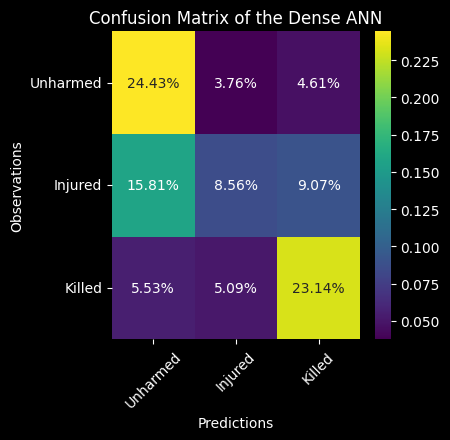

In [10]:
visualization.plot_confusion_matrix(
    y_true=y_test,
    y_pred=test_pred_class,
    model_name=models_df.loc[MODEL_ID, "model"].name.replace("_", " "),
)

## Ordinal Regression with Coral

In [11]:
MODEL_ID = "coral_ann"

NUM_CLASSES = 3
DROPOUT_RATE = 0.4

models_df.loc[MODEL_ID, "model"] = keras.Sequential(
    [
        keras.layers.Dense(128, activation="gelu"),
        keras.layers.Dropout(rate=DROPOUT_RATE),
        keras.layers.Dense(32, activation="gelu"),
        keras.layers.Dropout(rate=DROPOUT_RATE),
        coral.CoralOrdinal(num_classes=NUM_CLASSES),
    ],
    name="Coral_Ordinal_ANN",
)

models_df.loc[MODEL_ID, "model"].compile(
    loss=coral.OrdinalCrossEntropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy", coral.MeanAbsoluteErrorLabels()],
)

In [12]:
models_df.loc[MODEL_ID, "history"] = models_df.loc[MODEL_ID, "model"].fit(
    X_train, y_train, epochs=N_EPOCHS, validation_split=0.1, callbacks=callbacks
)

Epoch 1/20


  1/641 [..............................] - ETA: 25:48 - loss: 1.4110 - accuracy: 0.3750 - mean_absolute_error_labels: 0.9062

 19/641 [..............................] - ETA: 1s - loss: 1.4260 - accuracy: 0.3191 - mean_absolute_error_labels: 0.7796   

 37/641 [>.............................] - ETA: 1s - loss: 1.4015 - accuracy: 0.3226 - mean_absolute_error_labels: 0.7525

 56/641 [=>............................] - ETA: 1s - loss: 1.3181 - accuracy: 0.3292 - mean_absolute_error_labels: 0.6903

 75/641 [==>...........................] - ETA: 1s - loss: 1.2914 - accuracy: 0.3242 - mean_absolute_error_labels: 0.6671

 96/641 [===>..........................] - ETA: 1s - loss: 1.2600 - accuracy: 0.3320 - mean_absolute_error_labels: 0.6497

116/641 [====>.........................] - ETA: 1s - loss: 1.2363 - accuracy: 0.3300 - mean_absolute_error_labels: 0.6377

137/641 [=====>........................] - ETA: 1s - loss: 1.2229 - accuracy: 0.3307 - mean_absolute_error_labels: 0.6344

159/641 [======>.......................] - ETA: 1s - loss: 1.2050 - accuracy: 0.3327 - mean_absolute_error_labels: 0.6230

181/641 [=======>......................] - ETA: 1s - loss: 1.1944 - accuracy: 0.3320 - mean_absolute_error_labels: 0.6169

202/641 [========>.....................] - ETA: 1s - loss: 1.1847 - accuracy: 0.3303 - mean_absolute_error_labels: 0.6137

224/641 [=========>....................] - ETA: 1s - loss: 1.1786 - accuracy: 0.3301 - mean_absolute_error_labels: 0.6115

244/641 [==========>...................] - ETA: 1s - loss: 1.1774 - accuracy: 0.3295 - mean_absolute_error_labels: 0.6124

263/641 [===========>..................] - ETA: 0s - loss: 1.1728 - accuracy: 0.3303 - mean_absolute_error_labels: 0.6090

279/641 [============>.................] - ETA: 0s - loss: 1.1702 - accuracy: 0.3301 - mean_absolute_error_labels: 0.6089

297/641 [============>.................] - ETA: 0s - loss: 1.1661 - accuracy: 0.3311 - mean_absolute_error_labels: 0.6062

313/641 [=============>................] - ETA: 0s - loss: 1.1646 - accuracy: 0.3318 - mean_absolute_error_labels: 0.6067

330/641 [==============>...............] - ETA: 0s - loss: 1.1645 - accuracy: 0.3325 - mean_absolute_error_labels: 0.6077

346/641 [===============>..............] - ETA: 0s - loss: 1.1628 - accuracy: 0.3326 - mean_absolute_error_labels: 0.6073

367/641 [================>.............] - ETA: 0s - loss: 1.1601 - accuracy: 0.3342 - mean_absolute_error_labels: 0.6052

387/641 [=================>............] - ETA: 0s - loss: 1.1576 - accuracy: 0.3324 - mean_absolute_error_labels: 0.6008

406/641 [==================>...........] - ETA: 0s - loss: 1.1533 - accuracy: 0.3313 - mean_absolute_error_labels: 0.5988

428/641 [===================>..........] - ETA: 0s - loss: 1.1508 - accuracy: 0.3325 - mean_absolute_error_labels: 0.5960

448/641 [===================>..........] - ETA: 0s - loss: 1.1502 - accuracy: 0.3328 - mean_absolute_error_labels: 0.5971

468/641 [====================>.........] - ETA: 0s - loss: 1.1496 - accuracy: 0.3326 - mean_absolute_error_labels: 0.5966

484/641 [=====================>........] - ETA: 0s - loss: 1.1476 - accuracy: 0.3325 - mean_absolute_error_labels: 0.5957

501/641 [======================>.......] - ETA: 0s - loss: 1.1451 - accuracy: 0.3318 - mean_absolute_error_labels: 0.5943

516/641 [=======================>......] - ETA: 0s - loss: 1.1451 - accuracy: 0.3313 - mean_absolute_error_labels: 0.5933

531/641 [=======================>......] - ETA: 0s - loss: 1.1444 - accuracy: 0.3325 - mean_absolute_error_labels: 0.5926

542/641 [========================>.....] - ETA: 0s - loss: 1.1424 - accuracy: 0.3316 - mean_absolute_error_labels: 0.5915

556/641 [=========================>....] - ETA: 0s - loss: 1.1425 - accuracy: 0.3317 - mean_absolute_error_labels: 0.5923

571/641 [=========================>....] - ETA: 0s - loss: 1.1422 - accuracy: 0.3317 - mean_absolute_error_labels: 0.5925

588/641 [==========================>...] - ETA: 0s - loss: 1.1402 - accuracy: 0.3326 - mean_absolute_error_labels: 0.5923

608/641 [===========================>..] - ETA: 0s - loss: 1.1389 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5918

624/641 [============================>.] - ETA: 0s - loss: 1.1380 - accuracy: 0.3339 - mean_absolute_error_labels: 0.5910

634/641 [============================>.] - ETA: 0s - loss: 1.1379 - accuracy: 0.3339 - mean_absolute_error_labels: 0.5914

641/641 [==============================] - 5s 4ms/step - loss: 1.1376 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5916 - val_loss: 1.0965 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5985 - lr: 0.0100


Epoch 2/20


  1/641 [..............................] - ETA: 4s - loss: 1.0793 - accuracy: 0.3750 - mean_absolute_error_labels: 0.5312

  5/641 [..............................] - ETA: 7s - loss: 1.0765 - accuracy: 0.3625 - mean_absolute_error_labels: 0.5562

 22/641 [>.............................] - ETA: 2s - loss: 1.1029 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5795

 38/641 [>.............................] - ETA: 2s - loss: 1.1013 - accuracy: 0.3372 - mean_absolute_error_labels: 0.5781

 50/641 [=>............................] - ETA: 2s - loss: 1.1095 - accuracy: 0.3456 - mean_absolute_error_labels: 0.5825

 64/641 [=>............................] - ETA: 2s - loss: 1.1152 - accuracy: 0.3369 - mean_absolute_error_labels: 0.5835

 77/641 [==>...........................] - ETA: 2s - loss: 1.1134 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5808

 93/641 [===>..........................] - ETA: 2s - loss: 1.1140 - accuracy: 0.3377 - mean_absolute_error_labels: 0.5793

106/641 [===>..........................] - ETA: 2s - loss: 1.1166 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5820

119/641 [====>.........................] - ETA: 2s - loss: 1.1162 - accuracy: 0.3385 - mean_absolute_error_labels: 0.5785

134/641 [=====>........................] - ETA: 1s - loss: 1.1238 - accuracy: 0.3400 - mean_absolute_error_labels: 0.5868

151/641 [======>.......................] - ETA: 1s - loss: 1.1245 - accuracy: 0.3384 - mean_absolute_error_labels: 0.5884

162/641 [======>.......................] - ETA: 1s - loss: 1.1243 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5870

177/641 [=======>......................] - ETA: 1s - loss: 1.1220 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5883

194/641 [========>.....................] - ETA: 1s - loss: 1.1194 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5859

209/641 [========>.....................] - ETA: 1s - loss: 1.1187 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5848

226/641 [=========>....................] - ETA: 1s - loss: 1.1167 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5834

241/641 [==========>...................] - ETA: 1s - loss: 1.1157 - accuracy: 0.3326 - mean_absolute_error_labels: 0.5827

252/641 [==========>...................] - ETA: 1s - loss: 1.1164 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5830

269/641 [===========>..................] - ETA: 1s - loss: 1.1171 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5829

286/641 [============>.................] - ETA: 1s - loss: 1.1175 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5827

301/641 [=============>................] - ETA: 1s - loss: 1.1180 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5831

319/641 [=============>................] - ETA: 1s - loss: 1.1185 - accuracy: 0.3347 - mean_absolute_error_labels: 0.5842

337/641 [==============>...............] - ETA: 1s - loss: 1.1170 - accuracy: 0.3365 - mean_absolute_error_labels: 0.5832

350/641 [===============>..............] - ETA: 1s - loss: 1.1166 - accuracy: 0.3365 - mean_absolute_error_labels: 0.5827

359/641 [===============>..............] - ETA: 1s - loss: 1.1169 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5839

372/641 [================>.............] - ETA: 0s - loss: 1.1153 - accuracy: 0.3366 - mean_absolute_error_labels: 0.5827

385/641 [=================>............] - ETA: 0s - loss: 1.1157 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5828

400/641 [=================>............] - ETA: 0s - loss: 1.1169 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5827

410/641 [==================>...........] - ETA: 0s - loss: 1.1167 - accuracy: 0.3375 - mean_absolute_error_labels: 0.5825

422/641 [==================>...........] - ETA: 0s - loss: 1.1164 - accuracy: 0.3372 - mean_absolute_error_labels: 0.5820

434/641 [===================>..........] - ETA: 0s - loss: 1.1159 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5816

450/641 [====================>.........] - ETA: 0s - loss: 1.1145 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5807

467/641 [====================>.........] - ETA: 0s - loss: 1.1132 - accuracy: 0.3359 - mean_absolute_error_labels: 0.5794

485/641 [=====================>........] - ETA: 0s - loss: 1.1136 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5798

500/641 [======================>.......] - ETA: 0s - loss: 1.1132 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5794

518/641 [=======================>......] - ETA: 0s - loss: 1.1144 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5800

538/641 [========================>.....] - ETA: 0s - loss: 1.1138 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5794

553/641 [========================>.....] - ETA: 0s - loss: 1.1132 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5791

570/641 [=========================>....] - ETA: 0s - loss: 1.1118 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5780

589/641 [==========================>...] - ETA: 0s - loss: 1.1110 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5771

609/641 [===========================>..] - ETA: 0s - loss: 1.1111 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5767

629/641 [============================>.] - ETA: 0s - loss: 1.1104 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5760

641/641 [==============================] - 2s 4ms/step - loss: 1.1108 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5763 - val_loss: 1.0977 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.6029 - lr: 0.0100


Epoch 3/20


  1/641 [..............................] - ETA: 2s - loss: 1.0905 - accuracy: 0.3438 - mean_absolute_error_labels: 0.6562

 20/641 [..............................] - ETA: 1s - loss: 1.0768 - accuracy: 0.3500 - mean_absolute_error_labels: 0.5437

 38/641 [>.............................] - ETA: 1s - loss: 1.0636 - accuracy: 0.3429 - mean_absolute_error_labels: 0.5411

 53/641 [=>............................] - ETA: 1s - loss: 1.0817 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5513

 71/641 [==>...........................] - ETA: 1s - loss: 1.0833 - accuracy: 0.3327 - mean_absolute_error_labels: 0.5568

 89/641 [===>..........................] - ETA: 1s - loss: 1.0938 - accuracy: 0.3315 - mean_absolute_error_labels: 0.5671

107/641 [====>.........................] - ETA: 1s - loss: 1.0819 - accuracy: 0.3312 - mean_absolute_error_labels: 0.5575

125/641 [====>.........................] - ETA: 1s - loss: 1.0833 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5602

143/641 [=====>........................] - ETA: 1s - loss: 1.0935 - accuracy: 0.3317 - mean_absolute_error_labels: 0.5640

163/641 [======>.......................] - ETA: 1s - loss: 1.0879 - accuracy: 0.3294 - mean_absolute_error_labels: 0.5623

183/641 [=======>......................] - ETA: 1s - loss: 1.0890 - accuracy: 0.3255 - mean_absolute_error_labels: 0.5605

204/641 [========>.....................] - ETA: 1s - loss: 1.0939 - accuracy: 0.3275 - mean_absolute_error_labels: 0.5636

225/641 [=========>....................] - ETA: 1s - loss: 1.0959 - accuracy: 0.3293 - mean_absolute_error_labels: 0.5642

244/641 [==========>...................] - ETA: 1s - loss: 1.0966 - accuracy: 0.3307 - mean_absolute_error_labels: 0.5638

264/641 [===========>..................] - ETA: 1s - loss: 1.0969 - accuracy: 0.3318 - mean_absolute_error_labels: 0.5651

283/641 [============>.................] - ETA: 0s - loss: 1.0935 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5645

300/641 [=============>................] - ETA: 0s - loss: 1.0947 - accuracy: 0.3320 - mean_absolute_error_labels: 0.5653

316/641 [=============>................] - ETA: 0s - loss: 1.0954 - accuracy: 0.3333 - mean_absolute_error_labels: 0.5648

332/641 [==============>...............] - ETA: 0s - loss: 1.0956 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5643

350/641 [===============>..............] - ETA: 0s - loss: 1.0973 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5661

368/641 [================>.............] - ETA: 0s - loss: 1.0985 - accuracy: 0.3325 - mean_absolute_error_labels: 0.5662

386/641 [=================>............] - ETA: 0s - loss: 1.0978 - accuracy: 0.3327 - mean_absolute_error_labels: 0.5653

404/641 [=================>............] - ETA: 0s - loss: 1.0982 - accuracy: 0.3330 - mean_absolute_error_labels: 0.5661

422/641 [==================>...........] - ETA: 0s - loss: 1.0999 - accuracy: 0.3339 - mean_absolute_error_labels: 0.5673

440/641 [===================>..........] - ETA: 0s - loss: 1.0994 - accuracy: 0.3347 - mean_absolute_error_labels: 0.5663

460/641 [====================>.........] - ETA: 0s - loss: 1.0992 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5660

481/641 [=====================>........] - ETA: 0s - loss: 1.1009 - accuracy: 0.3348 - mean_absolute_error_labels: 0.5664

502/641 [======================>.......] - ETA: 0s - loss: 1.1025 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5680

524/641 [=======================>......] - ETA: 0s - loss: 1.1028 - accuracy: 0.3365 - mean_absolute_error_labels: 0.5682

544/641 [========================>.....] - ETA: 0s - loss: 1.1040 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5692

567/641 [=========================>....] - ETA: 0s - loss: 1.1046 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5696

588/641 [==========================>...] - ETA: 0s - loss: 1.1048 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5698

609/641 [===========================>..] - ETA: 0s - loss: 1.1033 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5685

630/641 [============================>.] - ETA: 0s - loss: 1.1036 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5689

641/641 [==============================] - 2s 3ms/step - loss: 1.1039 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5691 - val_loss: 1.0441 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5464 - lr: 0.0100


Epoch 4/20


  1/641 [..............................] - ETA: 2s - loss: 0.9909 - accuracy: 0.2500 - mean_absolute_error_labels: 0.5312

 20/641 [..............................] - ETA: 1s - loss: 1.0783 - accuracy: 0.3094 - mean_absolute_error_labels: 0.5547

 40/641 [>.............................] - ETA: 1s - loss: 1.0515 - accuracy: 0.3164 - mean_absolute_error_labels: 0.5430

 58/641 [=>............................] - ETA: 1s - loss: 1.0769 - accuracy: 0.3211 - mean_absolute_error_labels: 0.5587

 78/641 [==>...........................] - ETA: 1s - loss: 1.0766 - accuracy: 0.3269 - mean_absolute_error_labels: 0.5541

 99/641 [===>..........................] - ETA: 1s - loss: 1.0745 - accuracy: 0.3223 - mean_absolute_error_labels: 0.5559

120/641 [====>.........................] - ETA: 1s - loss: 1.0825 - accuracy: 0.3284 - mean_absolute_error_labels: 0.5570

141/641 [=====>........................] - ETA: 1s - loss: 1.0837 - accuracy: 0.3305 - mean_absolute_error_labels: 0.5581

162/641 [======>.......................] - ETA: 1s - loss: 1.0865 - accuracy: 0.3331 - mean_absolute_error_labels: 0.5561

183/641 [=======>......................] - ETA: 1s - loss: 1.0912 - accuracy: 0.3311 - mean_absolute_error_labels: 0.5594

201/641 [========>.....................] - ETA: 1s - loss: 1.0931 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5614

221/641 [=========>....................] - ETA: 1s - loss: 1.0942 - accuracy: 0.3326 - mean_absolute_error_labels: 0.5615

241/641 [==========>...................] - ETA: 1s - loss: 1.0953 - accuracy: 0.3335 - mean_absolute_error_labels: 0.5624

261/641 [===========>..................] - ETA: 0s - loss: 1.0976 - accuracy: 0.3330 - mean_absolute_error_labels: 0.5635

281/641 [============>.................] - ETA: 0s - loss: 1.1003 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5661

301/641 [=============>................] - ETA: 0s - loss: 1.1019 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5665

320/641 [=============>................] - ETA: 0s - loss: 1.1052 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5682

338/641 [==============>...............] - ETA: 0s - loss: 1.1040 - accuracy: 0.3330 - mean_absolute_error_labels: 0.5659

359/641 [===============>..............] - ETA: 0s - loss: 1.1045 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5676

380/641 [================>.............] - ETA: 0s - loss: 1.1047 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5669

401/641 [=================>............] - ETA: 0s - loss: 1.1054 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5672

422/641 [==================>...........] - ETA: 0s - loss: 1.1096 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5692

442/641 [===================>..........] - ETA: 0s - loss: 1.1104 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5705

463/641 [====================>.........] - ETA: 0s - loss: 1.1089 - accuracy: 0.3347 - mean_absolute_error_labels: 0.5699

485/641 [=====================>........] - ETA: 0s - loss: 1.1094 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5704

508/641 [======================>.......] - ETA: 0s - loss: 1.1123 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5728

529/641 [=======================>......] - ETA: 0s - loss: 1.1121 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5730

551/641 [========================>.....] - ETA: 0s - loss: 1.1123 - accuracy: 0.3327 - mean_absolute_error_labels: 0.5727

573/641 [=========================>....] - ETA: 0s - loss: 1.1143 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5748

593/641 [==========================>...] - ETA: 0s - loss: 1.1135 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5743

613/641 [===========================>..] - ETA: 0s - loss: 1.1145 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5750

634/641 [============================>.] - ETA: 0s - loss: 1.1145 - accuracy: 0.3347 - mean_absolute_error_labels: 0.5757

641/641 [==============================] - 2s 3ms/step - loss: 1.1137 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5751 - val_loss: 1.0851 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5638 - lr: 0.0100


Epoch 5/20


  1/641 [..............................] - ETA: 1s - loss: 1.3834 - accuracy: 0.3438 - mean_absolute_error_labels: 0.7500

 22/641 [>.............................] - ETA: 1s - loss: 1.1173 - accuracy: 0.3452 - mean_absolute_error_labels: 0.5866

 43/641 [=>............................] - ETA: 1s - loss: 1.1120 - accuracy: 0.3227 - mean_absolute_error_labels: 0.5654

 65/641 [==>...........................] - ETA: 1s - loss: 1.1065 - accuracy: 0.3216 - mean_absolute_error_labels: 0.5582

 87/641 [===>..........................] - ETA: 1s - loss: 1.1085 - accuracy: 0.3305 - mean_absolute_error_labels: 0.5629

109/641 [====>.........................] - ETA: 1s - loss: 1.1167 - accuracy: 0.3274 - mean_absolute_error_labels: 0.5668

130/641 [=====>........................] - ETA: 1s - loss: 1.1154 - accuracy: 0.3293 - mean_absolute_error_labels: 0.5647

151/641 [======>.......................] - ETA: 1s - loss: 1.1169 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5664

172/641 [=======>......................] - ETA: 1s - loss: 1.1141 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5643

192/641 [=======>......................] - ETA: 1s - loss: 1.1184 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5653

212/641 [========>.....................] - ETA: 1s - loss: 1.1199 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5677

233/641 [=========>....................] - ETA: 0s - loss: 1.1218 - accuracy: 0.3366 - mean_absolute_error_labels: 0.5708

254/641 [==========>...................] - ETA: 0s - loss: 1.1242 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5710

275/641 [===========>..................] - ETA: 0s - loss: 1.1235 - accuracy: 0.3331 - mean_absolute_error_labels: 0.5698

297/641 [============>.................] - ETA: 0s - loss: 1.1217 - accuracy: 0.3326 - mean_absolute_error_labels: 0.5700

317/641 [=============>................] - ETA: 0s - loss: 1.1224 - accuracy: 0.3348 - mean_absolute_error_labels: 0.5700

337/641 [==============>...............] - ETA: 0s - loss: 1.1227 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5717

357/641 [===============>..............] - ETA: 0s - loss: 1.1206 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5702

373/641 [================>.............] - ETA: 0s - loss: 1.1199 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5700

394/641 [=================>............] - ETA: 0s - loss: 1.1203 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5707

414/641 [==================>...........] - ETA: 0s - loss: 1.1195 - accuracy: 0.3328 - mean_absolute_error_labels: 0.5703

435/641 [===================>..........] - ETA: 0s - loss: 1.1193 - accuracy: 0.3323 - mean_absolute_error_labels: 0.5695

456/641 [====================>.........] - ETA: 0s - loss: 1.1198 - accuracy: 0.3333 - mean_absolute_error_labels: 0.5703

478/641 [=====================>........] - ETA: 0s - loss: 1.1213 - accuracy: 0.3326 - mean_absolute_error_labels: 0.5713

498/641 [======================>.......] - ETA: 0s - loss: 1.1199 - accuracy: 0.3323 - mean_absolute_error_labels: 0.5699

518/641 [=======================>......] - ETA: 0s - loss: 1.1175 - accuracy: 0.3319 - mean_absolute_error_labels: 0.5682

539/641 [========================>.....] - ETA: 0s - loss: 1.1160 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5672

558/641 [=========================>....] - ETA: 0s - loss: 1.1163 - accuracy: 0.3331 - mean_absolute_error_labels: 0.5679

578/641 [==========================>...] - ETA: 0s - loss: 1.1175 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5695

600/641 [===========================>..] - ETA: 0s - loss: 1.1177 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5708

620/641 [============================>.] - ETA: 0s - loss: 1.1165 - accuracy: 0.3347 - mean_absolute_error_labels: 0.5702

641/641 [==============================] - ETA: 0s - loss: 1.1170 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5708

641/641 [==============================] - 2s 3ms/step - loss: 1.1170 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5708 - val_loss: 1.0694 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5686 - lr: 0.0100


Epoch 6/20


  1/641 [..............................] - ETA: 3s - loss: 1.0058 - accuracy: 0.3438 - mean_absolute_error_labels: 0.5312

 23/641 [>.............................] - ETA: 1s - loss: 1.1092 - accuracy: 0.3573 - mean_absolute_error_labels: 0.5666

 44/641 [=>............................] - ETA: 1s - loss: 1.1080 - accuracy: 0.3501 - mean_absolute_error_labels: 0.5675

 64/641 [=>............................] - ETA: 1s - loss: 1.0995 - accuracy: 0.3521 - mean_absolute_error_labels: 0.5659

 85/641 [==>...........................] - ETA: 1s - loss: 1.1000 - accuracy: 0.3474 - mean_absolute_error_labels: 0.5669

106/641 [===>..........................] - ETA: 1s - loss: 1.0995 - accuracy: 0.3449 - mean_absolute_error_labels: 0.5678

128/641 [====>.........................] - ETA: 1s - loss: 1.0984 - accuracy: 0.3420 - mean_absolute_error_labels: 0.5654

148/641 [=====>........................] - ETA: 1s - loss: 1.1031 - accuracy: 0.3357 - mean_absolute_error_labels: 0.5667

169/641 [======>.......................] - ETA: 1s - loss: 1.1057 - accuracy: 0.3404 - mean_absolute_error_labels: 0.5710

190/641 [=======>......................] - ETA: 1s - loss: 1.1099 - accuracy: 0.3410 - mean_absolute_error_labels: 0.5711

212/641 [========>.....................] - ETA: 1s - loss: 1.1090 - accuracy: 0.3392 - mean_absolute_error_labels: 0.5722

234/641 [=========>....................] - ETA: 0s - loss: 1.1072 - accuracy: 0.3387 - mean_absolute_error_labels: 0.5688

255/641 [==========>...................] - ETA: 0s - loss: 1.1059 - accuracy: 0.3375 - mean_absolute_error_labels: 0.5683

276/641 [===========>..................] - ETA: 0s - loss: 1.1077 - accuracy: 0.3365 - mean_absolute_error_labels: 0.5686

297/641 [============>.................] - ETA: 0s - loss: 1.1065 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5672

319/641 [=============>................] - ETA: 0s - loss: 1.1062 - accuracy: 0.3373 - mean_absolute_error_labels: 0.5669

341/641 [==============>...............] - ETA: 0s - loss: 1.1069 - accuracy: 0.3372 - mean_absolute_error_labels: 0.5687

363/641 [===============>..............] - ETA: 0s - loss: 1.1054 - accuracy: 0.3365 - mean_absolute_error_labels: 0.5668

384/641 [================>.............] - ETA: 0s - loss: 1.1056 - accuracy: 0.3363 - mean_absolute_error_labels: 0.5668

406/641 [==================>...........] - ETA: 0s - loss: 1.1085 - accuracy: 0.3374 - mean_absolute_error_labels: 0.5696

429/641 [===================>..........] - ETA: 0s - loss: 1.1072 - accuracy: 0.3357 - mean_absolute_error_labels: 0.5688

451/641 [====================>.........] - ETA: 0s - loss: 1.1094 - accuracy: 0.3361 - mean_absolute_error_labels: 0.5710

471/641 [=====================>........] - ETA: 0s - loss: 1.1096 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5707

490/641 [=====================>........] - ETA: 0s - loss: 1.1084 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5691

509/641 [======================>.......] - ETA: 0s - loss: 1.1098 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5702

530/641 [=======================>......] - ETA: 0s - loss: 1.1085 - accuracy: 0.3348 - mean_absolute_error_labels: 0.5692

552/641 [========================>.....] - ETA: 0s - loss: 1.1092 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5696

575/641 [=========================>....] - ETA: 0s - loss: 1.1088 - accuracy: 0.3335 - mean_absolute_error_labels: 0.5683

594/641 [==========================>...] - ETA: 0s - loss: 1.1084 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5681

613/641 [===========================>..] - ETA: 0s - loss: 1.1087 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5680

631/641 [============================>.] - ETA: 0s - loss: 1.1076 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5671

641/641 [==============================] - 2s 3ms/step - loss: 1.1071 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5668 - val_loss: 1.0761 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5881 - lr: 0.0100


Epoch 7/20


  1/641 [..............................] - ETA: 2s - loss: 1.1120 - accuracy: 0.2812 - mean_absolute_error_labels: 0.5000

 23/641 [>.............................] - ETA: 1s - loss: 1.1580 - accuracy: 0.3288 - mean_absolute_error_labels: 0.5897

 45/641 [=>............................] - ETA: 1s - loss: 1.1228 - accuracy: 0.3382 - mean_absolute_error_labels: 0.5674

 65/641 [==>...........................] - ETA: 1s - loss: 1.1027 - accuracy: 0.3389 - mean_absolute_error_labels: 0.5567

 86/641 [===>..........................] - ETA: 1s - loss: 1.0904 - accuracy: 0.3328 - mean_absolute_error_labels: 0.5494

108/641 [====>.........................] - ETA: 1s - loss: 1.0922 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5489

129/641 [=====>........................] - ETA: 1s - loss: 1.0965 - accuracy: 0.3375 - mean_absolute_error_labels: 0.5547

151/641 [======>.......................] - ETA: 1s - loss: 1.0908 - accuracy: 0.3402 - mean_absolute_error_labels: 0.5528

172/641 [=======>......................] - ETA: 1s - loss: 1.0926 - accuracy: 0.3405 - mean_absolute_error_labels: 0.5547

193/641 [========>.....................] - ETA: 1s - loss: 1.0920 - accuracy: 0.3397 - mean_absolute_error_labels: 0.5536

213/641 [========>.....................] - ETA: 1s - loss: 1.0930 - accuracy: 0.3373 - mean_absolute_error_labels: 0.5552

233/641 [=========>....................] - ETA: 0s - loss: 1.0927 - accuracy: 0.3381 - mean_absolute_error_labels: 0.5571

254/641 [==========>...................] - ETA: 0s - loss: 1.0930 - accuracy: 0.3377 - mean_absolute_error_labels: 0.5591

275/641 [===========>..................] - ETA: 0s - loss: 1.0940 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5597

297/641 [============>.................] - ETA: 0s - loss: 1.0966 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5613

319/641 [=============>................] - ETA: 0s - loss: 1.0994 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5637

339/641 [==============>...............] - ETA: 0s - loss: 1.1001 - accuracy: 0.3327 - mean_absolute_error_labels: 0.5630

361/641 [===============>..............] - ETA: 0s - loss: 1.1027 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5633

382/641 [================>.............] - ETA: 0s - loss: 1.1021 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5638

403/641 [=================>............] - ETA: 0s - loss: 1.1033 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5653

424/641 [==================>...........] - ETA: 0s - loss: 1.1040 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5660

445/641 [===================>..........] - ETA: 0s - loss: 1.1035 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5654

468/641 [====================>.........] - ETA: 0s - loss: 1.1031 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5652

490/641 [=====================>........] - ETA: 0s - loss: 1.1011 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5639

511/641 [======================>.......] - ETA: 0s - loss: 1.1016 - accuracy: 0.3353 - mean_absolute_error_labels: 0.5638

533/641 [=======================>......] - ETA: 0s - loss: 1.1029 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5648

554/641 [========================>.....] - ETA: 0s - loss: 1.1039 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5648

571/641 [=========================>....] - ETA: 0s - loss: 1.1055 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5662

593/641 [==========================>...] - ETA: 0s - loss: 1.1034 - accuracy: 0.3353 - mean_absolute_error_labels: 0.5653

614/641 [===========================>..] - ETA: 0s - loss: 1.1050 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5669

635/641 [============================>.] - ETA: 0s - loss: 1.1044 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5665

641/641 [==============================] - 2s 3ms/step - loss: 1.1046 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5664 - val_loss: 1.0724 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5586 - lr: 0.0100


Epoch 8/20


  1/641 [..............................] - ETA: 1s - loss: 1.0698 - accuracy: 0.3438 - mean_absolute_error_labels: 0.5938

 22/641 [>.............................] - ETA: 1s - loss: 1.0871 - accuracy: 0.3267 - mean_absolute_error_labels: 0.5469

 42/641 [>.............................] - ETA: 1s - loss: 1.0588 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5268

 62/641 [=>............................] - ETA: 1s - loss: 1.0887 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5449

 78/641 [==>...........................] - ETA: 1s - loss: 1.0945 - accuracy: 0.3333 - mean_absolute_error_labels: 0.5469

 98/641 [===>..........................] - ETA: 1s - loss: 1.0994 - accuracy: 0.3402 - mean_absolute_error_labels: 0.5545

119/641 [====>.........................] - ETA: 1s - loss: 1.1060 - accuracy: 0.3382 - mean_absolute_error_labels: 0.5586

140/641 [=====>........................] - ETA: 1s - loss: 1.1056 - accuracy: 0.3371 - mean_absolute_error_labels: 0.5560

160/641 [======>.......................] - ETA: 1s - loss: 1.1035 - accuracy: 0.3348 - mean_absolute_error_labels: 0.5549

178/641 [=======>......................] - ETA: 1s - loss: 1.1027 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5542

198/641 [========>.....................] - ETA: 1s - loss: 1.1034 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5548

217/641 [=========>....................] - ETA: 1s - loss: 1.1049 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5546

235/641 [=========>....................] - ETA: 1s - loss: 1.1064 - accuracy: 0.3318 - mean_absolute_error_labels: 0.5580

251/641 [==========>...................] - ETA: 1s - loss: 1.1053 - accuracy: 0.3318 - mean_absolute_error_labels: 0.5586

269/641 [===========>..................] - ETA: 1s - loss: 1.1059 - accuracy: 0.3291 - mean_absolute_error_labels: 0.5596

287/641 [============>.................] - ETA: 0s - loss: 1.1046 - accuracy: 0.3295 - mean_absolute_error_labels: 0.5605

307/641 [=============>................] - ETA: 0s - loss: 1.1053 - accuracy: 0.3284 - mean_absolute_error_labels: 0.5589

327/641 [==============>...............] - ETA: 0s - loss: 1.1062 - accuracy: 0.3286 - mean_absolute_error_labels: 0.5611

348/641 [===============>..............] - ETA: 0s - loss: 1.1044 - accuracy: 0.3278 - mean_absolute_error_labels: 0.5606

368/641 [================>.............] - ETA: 0s - loss: 1.1055 - accuracy: 0.3286 - mean_absolute_error_labels: 0.5612

390/641 [=================>............] - ETA: 0s - loss: 1.1043 - accuracy: 0.3282 - mean_absolute_error_labels: 0.5606

411/641 [==================>...........] - ETA: 0s - loss: 1.1033 - accuracy: 0.3286 - mean_absolute_error_labels: 0.5588

431/641 [===================>..........] - ETA: 0s - loss: 1.1022 - accuracy: 0.3292 - mean_absolute_error_labels: 0.5586

451/641 [====================>.........] - ETA: 0s - loss: 1.1057 - accuracy: 0.3309 - mean_absolute_error_labels: 0.5617

472/641 [=====================>........] - ETA: 0s - loss: 1.1084 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5640

493/641 [======================>.......] - ETA: 0s - loss: 1.1108 - accuracy: 0.3318 - mean_absolute_error_labels: 0.5657

514/641 [=======================>......] - ETA: 0s - loss: 1.1118 - accuracy: 0.3332 - mean_absolute_error_labels: 0.5659

534/641 [=======================>......] - ETA: 0s - loss: 1.1102 - accuracy: 0.3347 - mean_absolute_error_labels: 0.5648

555/641 [========================>.....] - ETA: 0s - loss: 1.1100 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5649

575/641 [=========================>....] - ETA: 0s - loss: 1.1084 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5639

596/641 [==========================>...] - ETA: 0s - loss: 1.1083 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5637

616/641 [===========================>..] - ETA: 0s - loss: 1.1095 - accuracy: 0.3339 - mean_absolute_error_labels: 0.5650

636/641 [============================>.] - ETA: 0s - loss: 1.1106 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5660

641/641 [==============================] - 2s 3ms/step - loss: 1.1102 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5656 - val_loss: 1.0521 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5395 - lr: 0.0100


Epoch 9/20


  1/641 [..............................] - ETA: 1s - loss: 1.1675 - accuracy: 0.1875 - mean_absolute_error_labels: 0.6875

 22/641 [>.............................] - ETA: 1s - loss: 1.1277 - accuracy: 0.3068 - mean_absolute_error_labels: 0.5810

 42/641 [>.............................] - ETA: 1s - loss: 1.1158 - accuracy: 0.3237 - mean_absolute_error_labels: 0.5692

 62/641 [=>............................] - ETA: 1s - loss: 1.1128 - accuracy: 0.3216 - mean_absolute_error_labels: 0.5726

 81/641 [==>...........................] - ETA: 1s - loss: 1.1096 - accuracy: 0.3318 - mean_absolute_error_labels: 0.5741

101/641 [===>..........................] - ETA: 1s - loss: 1.1057 - accuracy: 0.3270 - mean_absolute_error_labels: 0.5678

120/641 [====>.........................] - ETA: 1s - loss: 1.1081 - accuracy: 0.3315 - mean_absolute_error_labels: 0.5695

141/641 [=====>........................] - ETA: 1s - loss: 1.1044 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5663

161/641 [======>.......................] - ETA: 1s - loss: 1.1034 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5679

181/641 [=======>......................] - ETA: 1s - loss: 1.1064 - accuracy: 0.3375 - mean_absolute_error_labels: 0.5684

202/641 [========>.....................] - ETA: 1s - loss: 1.1042 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5662

223/641 [=========>....................] - ETA: 1s - loss: 1.1104 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5695

243/641 [==========>...................] - ETA: 1s - loss: 1.1097 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5694

263/641 [===========>..................] - ETA: 0s - loss: 1.1054 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5667

284/641 [============>.................] - ETA: 0s - loss: 1.1035 - accuracy: 0.3370 - mean_absolute_error_labels: 0.5650

305/641 [=============>................] - ETA: 0s - loss: 1.1023 - accuracy: 0.3380 - mean_absolute_error_labels: 0.5649

326/641 [==============>...............] - ETA: 0s - loss: 1.1083 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5679

347/641 [===============>..............] - ETA: 0s - loss: 1.1099 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5684

368/641 [================>.............] - ETA: 0s - loss: 1.1088 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5678

388/641 [=================>............] - ETA: 0s - loss: 1.1095 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5693

408/641 [==================>...........] - ETA: 0s - loss: 1.1065 - accuracy: 0.3333 - mean_absolute_error_labels: 0.5669

429/641 [===================>..........] - ETA: 0s - loss: 1.1076 - accuracy: 0.3330 - mean_absolute_error_labels: 0.5669

450/641 [====================>.........] - ETA: 0s - loss: 1.1070 - accuracy: 0.3326 - mean_absolute_error_labels: 0.5674

471/641 [=====================>........] - ETA: 0s - loss: 1.1070 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5658

491/641 [=====================>........] - ETA: 0s - loss: 1.1097 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5684

513/641 [=======================>......] - ETA: 0s - loss: 1.1109 - accuracy: 0.3333 - mean_absolute_error_labels: 0.5698

535/641 [========================>.....] - ETA: 0s - loss: 1.1122 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5704

557/641 [=========================>....] - ETA: 0s - loss: 1.1128 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5710

576/641 [=========================>....] - ETA: 0s - loss: 1.1118 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5702

595/641 [==========================>...] - ETA: 0s - loss: 1.1117 - accuracy: 0.3348 - mean_absolute_error_labels: 0.5706

614/641 [===========================>..] - ETA: 0s - loss: 1.1112 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5702

631/641 [============================>.] - ETA: 0s - loss: 1.1103 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5699

641/641 [==============================] - 2s 3ms/step - loss: 1.1107 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5699 - val_loss: 1.0655 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5573 - lr: 0.0100


Epoch 10/20


  1/641 [..............................] - ETA: 2s - loss: 0.9545 - accuracy: 0.4375 - mean_absolute_error_labels: 0.5312

 23/641 [>.............................] - ETA: 1s - loss: 1.0198 - accuracy: 0.3451 - mean_absolute_error_labels: 0.5136

 45/641 [=>............................] - ETA: 1s - loss: 1.0605 - accuracy: 0.3389 - mean_absolute_error_labels: 0.5424

 64/641 [=>............................] - ETA: 1s - loss: 1.0812 - accuracy: 0.3389 - mean_absolute_error_labels: 0.5562

 83/641 [==>...........................] - ETA: 1s - loss: 1.0874 - accuracy: 0.3381 - mean_absolute_error_labels: 0.5527

101/641 [===>..........................] - ETA: 1s - loss: 1.0978 - accuracy: 0.3382 - mean_absolute_error_labels: 0.5600

119/641 [====>.........................] - ETA: 1s - loss: 1.0997 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5593

137/641 [=====>........................] - ETA: 1s - loss: 1.0966 - accuracy: 0.3410 - mean_absolute_error_labels: 0.5579

155/641 [======>.......................] - ETA: 1s - loss: 1.1004 - accuracy: 0.3454 - mean_absolute_error_labels: 0.5643

174/641 [=======>......................] - ETA: 1s - loss: 1.0989 - accuracy: 0.3432 - mean_absolute_error_labels: 0.5621

194/641 [========>.....................] - ETA: 1s - loss: 1.0976 - accuracy: 0.3402 - mean_absolute_error_labels: 0.5599

214/641 [=========>....................] - ETA: 1s - loss: 1.0922 - accuracy: 0.3419 - mean_absolute_error_labels: 0.5571

235/641 [=========>....................] - ETA: 1s - loss: 1.0940 - accuracy: 0.3378 - mean_absolute_error_labels: 0.5560

256/641 [==========>...................] - ETA: 1s - loss: 1.0939 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5573

278/641 [============>.................] - ETA: 0s - loss: 1.0937 - accuracy: 0.3377 - mean_absolute_error_labels: 0.5588

299/641 [============>.................] - ETA: 0s - loss: 1.0941 - accuracy: 0.3366 - mean_absolute_error_labels: 0.5578

321/641 [==============>...............] - ETA: 0s - loss: 1.0910 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5548

343/641 [===============>..............] - ETA: 0s - loss: 1.0953 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5569

364/641 [================>.............] - ETA: 0s - loss: 1.0940 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5569

385/641 [=================>............] - ETA: 0s - loss: 1.0943 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5569

405/641 [=================>............] - ETA: 0s - loss: 1.0949 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5575

423/641 [==================>...........] - ETA: 0s - loss: 1.0943 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5572

443/641 [===================>..........] - ETA: 0s - loss: 1.0951 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5591

460/641 [====================>.........] - ETA: 0s - loss: 1.0951 - accuracy: 0.3368 - mean_absolute_error_labels: 0.5590

478/641 [=====================>........] - ETA: 0s - loss: 1.0951 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5590

496/641 [======================>.......] - ETA: 0s - loss: 1.0950 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5588

514/641 [=======================>......] - ETA: 0s - loss: 1.0945 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5581

533/641 [=======================>......] - ETA: 0s - loss: 1.0954 - accuracy: 0.3330 - mean_absolute_error_labels: 0.5586

554/641 [========================>.....] - ETA: 0s - loss: 1.0947 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5579

574/641 [=========================>....] - ETA: 0s - loss: 1.0954 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5589

594/641 [==========================>...] - ETA: 0s - loss: 1.0940 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5583

614/641 [===========================>..] - ETA: 0s - loss: 1.0938 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5580

633/641 [============================>.] - ETA: 0s - loss: 1.0937 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5582

641/641 [==============================] - 2s 3ms/step - loss: 1.0936 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5580 - val_loss: 1.0770 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5716 - lr: 0.0075


Epoch 11/20


  1/641 [..............................] - ETA: 2s - loss: 1.1388 - accuracy: 0.3750 - mean_absolute_error_labels: 0.5938

 23/641 [>.............................] - ETA: 1s - loss: 1.0742 - accuracy: 0.3234 - mean_absolute_error_labels: 0.5598

 45/641 [=>............................] - ETA: 1s - loss: 1.0623 - accuracy: 0.3326 - mean_absolute_error_labels: 0.5472

 67/641 [==>...........................] - ETA: 1s - loss: 1.0610 - accuracy: 0.3302 - mean_absolute_error_labels: 0.5462

 89/641 [===>..........................] - ETA: 1s - loss: 1.0642 - accuracy: 0.3388 - mean_absolute_error_labels: 0.5467

111/641 [====>.........................] - ETA: 1s - loss: 1.0674 - accuracy: 0.3429 - mean_absolute_error_labels: 0.5532

132/641 [=====>........................] - ETA: 1s - loss: 1.0666 - accuracy: 0.3419 - mean_absolute_error_labels: 0.5526

153/641 [======>.......................] - ETA: 1s - loss: 1.0656 - accuracy: 0.3401 - mean_absolute_error_labels: 0.5525

174/641 [=======>......................] - ETA: 1s - loss: 1.0696 - accuracy: 0.3396 - mean_absolute_error_labels: 0.5551

195/641 [========>.....................] - ETA: 1s - loss: 1.0720 - accuracy: 0.3375 - mean_absolute_error_labels: 0.5542

215/641 [=========>....................] - ETA: 1s - loss: 1.0771 - accuracy: 0.3388 - mean_absolute_error_labels: 0.5578

237/641 [==========>...................] - ETA: 0s - loss: 1.0744 - accuracy: 0.3379 - mean_absolute_error_labels: 0.5545

261/641 [===========>..................] - ETA: 0s - loss: 1.0792 - accuracy: 0.3369 - mean_absolute_error_labels: 0.5584

283/641 [============>.................] - ETA: 0s - loss: 1.0816 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5585

304/641 [=============>................] - ETA: 0s - loss: 1.0817 - accuracy: 0.3320 - mean_absolute_error_labels: 0.5582

325/641 [==============>...............] - ETA: 0s - loss: 1.0829 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5586

346/641 [===============>..............] - ETA: 0s - loss: 1.0836 - accuracy: 0.3323 - mean_absolute_error_labels: 0.5588

367/641 [================>.............] - ETA: 0s - loss: 1.0842 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5583

389/641 [=================>............] - ETA: 0s - loss: 1.0834 - accuracy: 0.3353 - mean_absolute_error_labels: 0.5574

411/641 [==================>...........] - ETA: 0s - loss: 1.0842 - accuracy: 0.3359 - mean_absolute_error_labels: 0.5574

433/641 [===================>..........] - ETA: 0s - loss: 1.0851 - accuracy: 0.3365 - mean_absolute_error_labels: 0.5583

454/641 [====================>.........] - ETA: 0s - loss: 1.0856 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5580

474/641 [=====================>........] - ETA: 0s - loss: 1.0867 - accuracy: 0.3357 - mean_absolute_error_labels: 0.5586

495/641 [======================>.......] - ETA: 0s - loss: 1.0861 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5576

517/641 [=======================>......] - ETA: 0s - loss: 1.0857 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5573

539/641 [========================>.....] - ETA: 0s - loss: 1.0842 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5561

561/641 [=========================>....] - ETA: 0s - loss: 1.0844 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5567

582/641 [==========================>...] - ETA: 0s - loss: 1.0831 - accuracy: 0.3330 - mean_absolute_error_labels: 0.5553

603/641 [===========================>..] - ETA: 0s - loss: 1.0833 - accuracy: 0.3332 - mean_absolute_error_labels: 0.5550

625/641 [============================>.] - ETA: 0s - loss: 1.0840 - accuracy: 0.3335 - mean_absolute_error_labels: 0.5555

641/641 [==============================] - 2s 3ms/step - loss: 1.0853 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5564 - val_loss: 1.1219 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.6068 - lr: 0.0075


Epoch 12/20


  1/641 [..............................] - ETA: 2s - loss: 1.1051 - accuracy: 0.3125 - mean_absolute_error_labels: 0.6250

 23/641 [>.............................] - ETA: 1s - loss: 1.0631 - accuracy: 0.3383 - mean_absolute_error_labels: 0.5639

 44/641 [=>............................] - ETA: 1s - loss: 1.0523 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5391

 66/641 [==>...........................] - ETA: 1s - loss: 1.0384 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5284

 88/641 [===>..........................] - ETA: 1s - loss: 1.0474 - accuracy: 0.3210 - mean_absolute_error_labels: 0.5330

109/641 [====>.........................] - ETA: 1s - loss: 1.0647 - accuracy: 0.3217 - mean_absolute_error_labels: 0.5447

131/641 [=====>........................] - ETA: 1s - loss: 1.0691 - accuracy: 0.3290 - mean_absolute_error_labels: 0.5470

153/641 [======>.......................] - ETA: 1s - loss: 1.0775 - accuracy: 0.3309 - mean_absolute_error_labels: 0.5521

173/641 [=======>......................] - ETA: 1s - loss: 1.0771 - accuracy: 0.3309 - mean_absolute_error_labels: 0.5511

195/641 [========>.....................] - ETA: 1s - loss: 1.0767 - accuracy: 0.3288 - mean_absolute_error_labels: 0.5494

215/641 [=========>....................] - ETA: 1s - loss: 1.0776 - accuracy: 0.3299 - mean_absolute_error_labels: 0.5515

234/641 [=========>....................] - ETA: 0s - loss: 1.0820 - accuracy: 0.3303 - mean_absolute_error_labels: 0.5557

253/641 [==========>...................] - ETA: 0s - loss: 1.0796 - accuracy: 0.3312 - mean_absolute_error_labels: 0.5535

271/641 [===========>..................] - ETA: 0s - loss: 1.0787 - accuracy: 0.3330 - mean_absolute_error_labels: 0.5532

287/641 [============>.................] - ETA: 0s - loss: 1.0784 - accuracy: 0.3320 - mean_absolute_error_labels: 0.5523

304/641 [=============>................] - ETA: 0s - loss: 1.0741 - accuracy: 0.3331 - mean_absolute_error_labels: 0.5500

322/641 [==============>...............] - ETA: 0s - loss: 1.0719 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5496

337/641 [==============>...............] - ETA: 0s - loss: 1.0722 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5488

351/641 [===============>..............] - ETA: 0s - loss: 1.0732 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5496

367/641 [================>.............] - ETA: 0s - loss: 1.0769 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5512

383/641 [================>.............] - ETA: 0s - loss: 1.0757 - accuracy: 0.3331 - mean_absolute_error_labels: 0.5503

400/641 [=================>............] - ETA: 0s - loss: 1.0774 - accuracy: 0.3339 - mean_absolute_error_labels: 0.5505

416/641 [==================>...........] - ETA: 0s - loss: 1.0787 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5516

431/641 [===================>..........] - ETA: 0s - loss: 1.0775 - accuracy: 0.3332 - mean_absolute_error_labels: 0.5506

448/641 [===================>..........] - ETA: 0s - loss: 1.0795 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5503

466/641 [====================>.........] - ETA: 0s - loss: 1.0799 - accuracy: 0.3321 - mean_absolute_error_labels: 0.5516

486/641 [=====================>........] - ETA: 0s - loss: 1.0804 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5529

505/641 [======================>.......] - ETA: 0s - loss: 1.0782 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5514

524/641 [=======================>......] - ETA: 0s - loss: 1.0791 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5516

543/641 [========================>.....] - ETA: 0s - loss: 1.0812 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5532

565/641 [=========================>....] - ETA: 0s - loss: 1.0811 - accuracy: 0.3335 - mean_absolute_error_labels: 0.5535

584/641 [==========================>...] - ETA: 0s - loss: 1.0806 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5537

603/641 [===========================>..] - ETA: 0s - loss: 1.0807 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5535

624/641 [============================>.] - ETA: 0s - loss: 1.0813 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5538

641/641 [==============================] - ETA: 0s - loss: 1.0821 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5544

641/641 [==============================] - 2s 3ms/step - loss: 1.0821 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5544 - val_loss: 1.0612 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5499 - lr: 0.0075


Epoch 13/20


  1/641 [..............................] - ETA: 3s - loss: 1.0849 - accuracy: 0.1875 - mean_absolute_error_labels: 0.5625

 18/641 [..............................] - ETA: 1s - loss: 1.0494 - accuracy: 0.3125 - mean_absolute_error_labels: 0.5052

 38/641 [>.............................] - ETA: 1s - loss: 1.0633 - accuracy: 0.3372 - mean_absolute_error_labels: 0.5452

 57/641 [=>............................] - ETA: 1s - loss: 1.0658 - accuracy: 0.3311 - mean_absolute_error_labels: 0.5400

 75/641 [==>...........................] - ETA: 1s - loss: 1.0500 - accuracy: 0.3225 - mean_absolute_error_labels: 0.5333

 90/641 [===>..........................] - ETA: 1s - loss: 1.0502 - accuracy: 0.3208 - mean_absolute_error_labels: 0.5295

106/641 [===>..........................] - ETA: 1s - loss: 1.0538 - accuracy: 0.3208 - mean_absolute_error_labels: 0.5321

117/641 [====>.........................] - ETA: 1s - loss: 1.0527 - accuracy: 0.3200 - mean_absolute_error_labels: 0.5329

131/641 [=====>........................] - ETA: 1s - loss: 1.0580 - accuracy: 0.3237 - mean_absolute_error_labels: 0.5372

145/641 [=====>........................] - ETA: 1s - loss: 1.0615 - accuracy: 0.3241 - mean_absolute_error_labels: 0.5390

158/641 [======>.......................] - ETA: 1s - loss: 1.0591 - accuracy: 0.3210 - mean_absolute_error_labels: 0.5376

171/641 [=======>......................] - ETA: 1s - loss: 1.0590 - accuracy: 0.3211 - mean_absolute_error_labels: 0.5375

185/641 [=======>......................] - ETA: 1s - loss: 1.0598 - accuracy: 0.3209 - mean_absolute_error_labels: 0.5402

198/641 [========>.....................] - ETA: 1s - loss: 1.0600 - accuracy: 0.3202 - mean_absolute_error_labels: 0.5396

212/641 [========>.....................] - ETA: 1s - loss: 1.0553 - accuracy: 0.3227 - mean_absolute_error_labels: 0.5361

228/641 [=========>....................] - ETA: 1s - loss: 1.0543 - accuracy: 0.3251 - mean_absolute_error_labels: 0.5352

240/641 [==========>...................] - ETA: 1s - loss: 1.0535 - accuracy: 0.3254 - mean_absolute_error_labels: 0.5346

252/641 [==========>...................] - ETA: 1s - loss: 1.0552 - accuracy: 0.3276 - mean_absolute_error_labels: 0.5361

265/641 [===========>..................] - ETA: 1s - loss: 1.0568 - accuracy: 0.3265 - mean_absolute_error_labels: 0.5368

275/641 [===========>..................] - ETA: 1s - loss: 1.0586 - accuracy: 0.3262 - mean_absolute_error_labels: 0.5383

286/641 [============>.................] - ETA: 1s - loss: 1.0587 - accuracy: 0.3274 - mean_absolute_error_labels: 0.5386

297/641 [============>.................] - ETA: 1s - loss: 1.0587 - accuracy: 0.3268 - mean_absolute_error_labels: 0.5392

310/641 [=============>................] - ETA: 1s - loss: 1.0594 - accuracy: 0.3273 - mean_absolute_error_labels: 0.5409

325/641 [==============>...............] - ETA: 1s - loss: 1.0604 - accuracy: 0.3285 - mean_absolute_error_labels: 0.5422

341/641 [==============>...............] - ETA: 1s - loss: 1.0627 - accuracy: 0.3302 - mean_absolute_error_labels: 0.5435

360/641 [===============>..............] - ETA: 1s - loss: 1.0634 - accuracy: 0.3301 - mean_absolute_error_labels: 0.5429

379/641 [================>.............] - ETA: 0s - loss: 1.0635 - accuracy: 0.3314 - mean_absolute_error_labels: 0.5421

398/641 [=================>............] - ETA: 0s - loss: 1.0632 - accuracy: 0.3317 - mean_absolute_error_labels: 0.5421

417/641 [==================>...........] - ETA: 0s - loss: 1.0628 - accuracy: 0.3304 - mean_absolute_error_labels: 0.5411

437/641 [===================>..........] - ETA: 0s - loss: 1.0625 - accuracy: 0.3315 - mean_absolute_error_labels: 0.5404

458/641 [====================>.........] - ETA: 0s - loss: 1.0644 - accuracy: 0.3313 - mean_absolute_error_labels: 0.5426

477/641 [=====================>........] - ETA: 0s - loss: 1.0638 - accuracy: 0.3314 - mean_absolute_error_labels: 0.5425

496/641 [======================>.......] - ETA: 0s - loss: 1.0648 - accuracy: 0.3308 - mean_absolute_error_labels: 0.5430

516/641 [=======================>......] - ETA: 0s - loss: 1.0664 - accuracy: 0.3319 - mean_absolute_error_labels: 0.5443

532/641 [=======================>......] - ETA: 0s - loss: 1.0677 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5448

541/641 [========================>.....] - ETA: 0s - loss: 1.0669 - accuracy: 0.3325 - mean_absolute_error_labels: 0.5441

553/641 [========================>.....] - ETA: 0s - loss: 1.0672 - accuracy: 0.3328 - mean_absolute_error_labels: 0.5440

564/641 [=========================>....] - ETA: 0s - loss: 1.0667 - accuracy: 0.3328 - mean_absolute_error_labels: 0.5432

578/641 [==========================>...] - ETA: 0s - loss: 1.0672 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5437

593/641 [==========================>...] - ETA: 0s - loss: 1.0680 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5438

608/641 [===========================>..] - ETA: 0s - loss: 1.0687 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5440

621/641 [============================>.] - ETA: 0s - loss: 1.0692 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5443

636/641 [============================>.] - ETA: 0s - loss: 1.0701 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5447

641/641 [==============================] - 2s 4ms/step - loss: 1.0701 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5445 - val_loss: 1.0693 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5525 - lr: 0.0075


Epoch 14/20


  1/641 [..............................] - ETA: 1s - loss: 1.0703 - accuracy: 0.2812 - mean_absolute_error_labels: 0.5000

 21/641 [..............................] - ETA: 1s - loss: 1.0621 - accuracy: 0.3170 - mean_absolute_error_labels: 0.5327

 40/641 [>.............................] - ETA: 1s - loss: 1.0707 - accuracy: 0.3211 - mean_absolute_error_labels: 0.5469

 60/641 [=>............................] - ETA: 1s - loss: 1.0738 - accuracy: 0.3193 - mean_absolute_error_labels: 0.5557

 80/641 [==>...........................] - ETA: 1s - loss: 1.0659 - accuracy: 0.3273 - mean_absolute_error_labels: 0.5457

101/641 [===>..........................] - ETA: 1s - loss: 1.0743 - accuracy: 0.3289 - mean_absolute_error_labels: 0.5526

122/641 [====>.........................] - ETA: 1s - loss: 1.0753 - accuracy: 0.3320 - mean_absolute_error_labels: 0.5510

141/641 [=====>........................] - ETA: 1s - loss: 1.0729 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5505

155/641 [======>.......................] - ETA: 1s - loss: 1.0702 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5504

167/641 [======>.......................] - ETA: 1s - loss: 1.0682 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5479

180/641 [=======>......................] - ETA: 1s - loss: 1.0657 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5477

193/641 [========>.....................] - ETA: 1s - loss: 1.0602 - accuracy: 0.3335 - mean_absolute_error_labels: 0.5427

206/641 [========>.....................] - ETA: 1s - loss: 1.0590 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5432

218/641 [=========>....................] - ETA: 1s - loss: 1.0599 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5447

230/641 [=========>....................] - ETA: 1s - loss: 1.0593 - accuracy: 0.3332 - mean_absolute_error_labels: 0.5446

244/641 [==========>...................] - ETA: 1s - loss: 1.0584 - accuracy: 0.3353 - mean_absolute_error_labels: 0.5442

262/641 [===========>..................] - ETA: 1s - loss: 1.0590 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5445

280/641 [============>.................] - ETA: 1s - loss: 1.0610 - accuracy: 0.3390 - mean_absolute_error_labels: 0.5464

298/641 [============>.................] - ETA: 1s - loss: 1.0574 - accuracy: 0.3389 - mean_absolute_error_labels: 0.5446

315/641 [=============>................] - ETA: 1s - loss: 1.0561 - accuracy: 0.3399 - mean_absolute_error_labels: 0.5425

333/641 [==============>...............] - ETA: 0s - loss: 1.0571 - accuracy: 0.3406 - mean_absolute_error_labels: 0.5437

352/641 [===============>..............] - ETA: 0s - loss: 1.0612 - accuracy: 0.3402 - mean_absolute_error_labels: 0.5448

373/641 [================>.............] - ETA: 0s - loss: 1.0671 - accuracy: 0.3394 - mean_absolute_error_labels: 0.5471

394/641 [=================>............] - ETA: 0s - loss: 1.0689 - accuracy: 0.3381 - mean_absolute_error_labels: 0.5483

415/641 [==================>...........] - ETA: 0s - loss: 1.0697 - accuracy: 0.3381 - mean_absolute_error_labels: 0.5492

437/641 [===================>..........] - ETA: 0s - loss: 1.0694 - accuracy: 0.3375 - mean_absolute_error_labels: 0.5491

458/641 [====================>.........] - ETA: 0s - loss: 1.0696 - accuracy: 0.3361 - mean_absolute_error_labels: 0.5485

476/641 [=====================>........] - ETA: 0s - loss: 1.0698 - accuracy: 0.3373 - mean_absolute_error_labels: 0.5481

495/641 [======================>.......] - ETA: 0s - loss: 1.0701 - accuracy: 0.3368 - mean_absolute_error_labels: 0.5484

514/641 [=======================>......] - ETA: 0s - loss: 1.0715 - accuracy: 0.3375 - mean_absolute_error_labels: 0.5491

535/641 [========================>.....] - ETA: 0s - loss: 1.0718 - accuracy: 0.3375 - mean_absolute_error_labels: 0.5492

554/641 [========================>.....] - ETA: 0s - loss: 1.0731 - accuracy: 0.3374 - mean_absolute_error_labels: 0.5507

566/641 [=========================>....] - ETA: 0s - loss: 1.0718 - accuracy: 0.3370 - mean_absolute_error_labels: 0.5493

577/641 [==========================>...] - ETA: 0s - loss: 1.0730 - accuracy: 0.3368 - mean_absolute_error_labels: 0.5502

587/641 [==========================>...] - ETA: 0s - loss: 1.0720 - accuracy: 0.3357 - mean_absolute_error_labels: 0.5499

603/641 [===========================>..] - ETA: 0s - loss: 1.0729 - accuracy: 0.3359 - mean_absolute_error_labels: 0.5503

621/641 [============================>.] - ETA: 0s - loss: 1.0727 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5503

638/641 [============================>.] - ETA: 0s - loss: 1.0734 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5498

641/641 [==============================] - 2s 3ms/step - loss: 1.0736 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5499 - val_loss: 1.1050 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5777 - lr: 0.0075


Epoch 15/20


  1/641 [..............................] - ETA: 2s - loss: 1.0573 - accuracy: 0.1562 - mean_absolute_error_labels: 0.4688

 21/641 [..............................] - ETA: 1s - loss: 1.0405 - accuracy: 0.2857 - mean_absolute_error_labels: 0.5223

 39/641 [>.............................] - ETA: 1s - loss: 1.0368 - accuracy: 0.3037 - mean_absolute_error_labels: 0.5208

 59/641 [=>............................] - ETA: 1s - loss: 1.0300 - accuracy: 0.3204 - mean_absolute_error_labels: 0.5212

 79/641 [==>...........................] - ETA: 1s - loss: 1.0482 - accuracy: 0.3149 - mean_absolute_error_labels: 0.5320

101/641 [===>..........................] - ETA: 1s - loss: 1.0455 - accuracy: 0.3218 - mean_absolute_error_labels: 0.5300

122/641 [====>.........................] - ETA: 1s - loss: 1.0438 - accuracy: 0.3274 - mean_absolute_error_labels: 0.5264

124/641 [====>.........................] - ETA: 1s - loss: 1.0451 - accuracy: 0.3274 - mean_absolute_error_labels: 0.5267

130/641 [=====>........................] - ETA: 1s - loss: 1.0476 - accuracy: 0.3250 - mean_absolute_error_labels: 0.5288

143/641 [=====>........................] - ETA: 1s - loss: 1.0476 - accuracy: 0.3278 - mean_absolute_error_labels: 0.5288

161/641 [======>.......................] - ETA: 1s - loss: 1.0569 - accuracy: 0.3315 - mean_absolute_error_labels: 0.5340

178/641 [=======>......................] - ETA: 1s - loss: 1.0571 - accuracy: 0.3304 - mean_absolute_error_labels: 0.5335

196/641 [========>.....................] - ETA: 1s - loss: 1.0628 - accuracy: 0.3297 - mean_absolute_error_labels: 0.5362

216/641 [=========>....................] - ETA: 1s - loss: 1.0602 - accuracy: 0.3300 - mean_absolute_error_labels: 0.5346

236/641 [==========>...................] - ETA: 1s - loss: 1.0604 - accuracy: 0.3305 - mean_absolute_error_labels: 0.5351

257/641 [===========>..................] - ETA: 1s - loss: 1.0598 - accuracy: 0.3310 - mean_absolute_error_labels: 0.5373

279/641 [============>.................] - ETA: 1s - loss: 1.0590 - accuracy: 0.3315 - mean_absolute_error_labels: 0.5382

300/641 [=============>................] - ETA: 1s - loss: 1.0637 - accuracy: 0.3321 - mean_absolute_error_labels: 0.5391

321/641 [==============>...............] - ETA: 0s - loss: 1.0662 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5393

339/641 [==============>...............] - ETA: 0s - loss: 1.0693 - accuracy: 0.3317 - mean_absolute_error_labels: 0.5404

359/641 [===============>..............] - ETA: 0s - loss: 1.0698 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5405

378/641 [================>.............] - ETA: 0s - loss: 1.0680 - accuracy: 0.3331 - mean_absolute_error_labels: 0.5395

399/641 [=================>............] - ETA: 0s - loss: 1.0701 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5404

420/641 [==================>...........] - ETA: 0s - loss: 1.0698 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5401

442/641 [===================>..........] - ETA: 0s - loss: 1.0703 - accuracy: 0.3339 - mean_absolute_error_labels: 0.5409

463/641 [====================>.........] - ETA: 0s - loss: 1.0693 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5408

484/641 [=====================>........] - ETA: 0s - loss: 1.0716 - accuracy: 0.3330 - mean_absolute_error_labels: 0.5436

504/641 [======================>.......] - ETA: 0s - loss: 1.0721 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5440

526/641 [=======================>......] - ETA: 0s - loss: 1.0739 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5460

547/641 [========================>.....] - ETA: 0s - loss: 1.0734 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5459

570/641 [=========================>....] - ETA: 0s - loss: 1.0741 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5462

591/641 [==========================>...] - ETA: 0s - loss: 1.0734 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5453

613/641 [===========================>..] - ETA: 0s - loss: 1.0723 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5446

635/641 [============================>.] - ETA: 0s - loss: 1.0713 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5445

641/641 [==============================] - 2s 3ms/step - loss: 1.0715 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5443 - val_loss: 1.0709 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5477 - lr: 0.0075


Epoch 16/20


  1/641 [..............................] - ETA: 3s - loss: 1.1091 - accuracy: 0.3750 - mean_absolute_error_labels: 0.6250

 22/641 [>.............................] - ETA: 1s - loss: 1.0697 - accuracy: 0.3224 - mean_absolute_error_labels: 0.5355

 43/641 [=>............................] - ETA: 1s - loss: 1.0563 - accuracy: 0.3285 - mean_absolute_error_labels: 0.5262

 64/641 [=>............................] - ETA: 1s - loss: 1.0739 - accuracy: 0.3379 - mean_absolute_error_labels: 0.5410

 85/641 [==>...........................] - ETA: 1s - loss: 1.0680 - accuracy: 0.3371 - mean_absolute_error_labels: 0.5397

105/641 [===>..........................] - ETA: 1s - loss: 1.0663 - accuracy: 0.3384 - mean_absolute_error_labels: 0.5360

126/641 [====>.........................] - ETA: 1s - loss: 1.0621 - accuracy: 0.3366 - mean_absolute_error_labels: 0.5308

147/641 [=====>........................] - ETA: 1s - loss: 1.0561 - accuracy: 0.3333 - mean_absolute_error_labels: 0.5308

167/641 [======>.......................] - ETA: 1s - loss: 1.0561 - accuracy: 0.3368 - mean_absolute_error_labels: 0.5318

189/641 [=======>......................] - ETA: 1s - loss: 1.0540 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5291

210/641 [========>.....................] - ETA: 1s - loss: 1.0501 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5249

231/641 [=========>....................] - ETA: 0s - loss: 1.0540 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5294

254/641 [==========>...................] - ETA: 0s - loss: 1.0573 - accuracy: 0.3327 - mean_absolute_error_labels: 0.5305

274/641 [===========>..................] - ETA: 0s - loss: 1.0592 - accuracy: 0.3318 - mean_absolute_error_labels: 0.5319

296/641 [============>.................] - ETA: 0s - loss: 1.0628 - accuracy: 0.3312 - mean_absolute_error_labels: 0.5351

317/641 [=============>................] - ETA: 0s - loss: 1.0652 - accuracy: 0.3310 - mean_absolute_error_labels: 0.5377

339/641 [==============>...............] - ETA: 0s - loss: 1.0658 - accuracy: 0.3317 - mean_absolute_error_labels: 0.5373

360/641 [===============>..............] - ETA: 0s - loss: 1.0661 - accuracy: 0.3318 - mean_absolute_error_labels: 0.5395

381/641 [================>.............] - ETA: 0s - loss: 1.0662 - accuracy: 0.3297 - mean_absolute_error_labels: 0.5389

403/641 [=================>............] - ETA: 0s - loss: 1.0643 - accuracy: 0.3305 - mean_absolute_error_labels: 0.5393

424/641 [==================>...........] - ETA: 0s - loss: 1.0656 - accuracy: 0.3303 - mean_absolute_error_labels: 0.5396

446/641 [===================>..........] - ETA: 0s - loss: 1.0673 - accuracy: 0.3317 - mean_absolute_error_labels: 0.5403

467/641 [====================>.........] - ETA: 0s - loss: 1.0675 - accuracy: 0.3325 - mean_absolute_error_labels: 0.5393

489/641 [=====================>........] - ETA: 0s - loss: 1.0695 - accuracy: 0.3326 - mean_absolute_error_labels: 0.5404

511/641 [======================>.......] - ETA: 0s - loss: 1.0696 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5412

532/641 [=======================>......] - ETA: 0s - loss: 1.0696 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5409

552/641 [========================>.....] - ETA: 0s - loss: 1.0718 - accuracy: 0.3332 - mean_absolute_error_labels: 0.5418

574/641 [=========================>....] - ETA: 0s - loss: 1.0735 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5422

595/641 [==========================>...] - ETA: 0s - loss: 1.0727 - accuracy: 0.3332 - mean_absolute_error_labels: 0.5415

617/641 [===========================>..] - ETA: 0s - loss: 1.0731 - accuracy: 0.3335 - mean_absolute_error_labels: 0.5418

638/641 [============================>.] - ETA: 0s - loss: 1.0717 - accuracy: 0.3339 - mean_absolute_error_labels: 0.5410

641/641 [==============================] - 2s 3ms/step - loss: 1.0717 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5410 - val_loss: 1.0723 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5308 - lr: 0.0075


Epoch 17/20


  1/641 [..............................] - ETA: 2s - loss: 1.1049 - accuracy: 0.1875 - mean_absolute_error_labels: 0.5000

 21/641 [..............................] - ETA: 1s - loss: 1.0219 - accuracy: 0.3408 - mean_absolute_error_labels: 0.4792

 41/641 [>.............................] - ETA: 1s - loss: 1.0119 - accuracy: 0.3438 - mean_absolute_error_labels: 0.4954

 61/641 [=>............................] - ETA: 1s - loss: 1.0362 - accuracy: 0.3371 - mean_absolute_error_labels: 0.5026

 84/641 [==>...........................] - ETA: 1s - loss: 1.0593 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5275

106/641 [===>..........................] - ETA: 1s - loss: 1.0583 - accuracy: 0.3376 - mean_absolute_error_labels: 0.5262

128/641 [====>.........................] - ETA: 1s - loss: 1.0667 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5312

149/641 [=====>........................] - ETA: 1s - loss: 1.0701 - accuracy: 0.3320 - mean_absolute_error_labels: 0.5323

171/641 [=======>......................] - ETA: 1s - loss: 1.0706 - accuracy: 0.3295 - mean_absolute_error_labels: 0.5309

192/641 [=======>......................] - ETA: 1s - loss: 1.0668 - accuracy: 0.3301 - mean_absolute_error_labels: 0.5293

214/641 [=========>....................] - ETA: 1s - loss: 1.0672 - accuracy: 0.3310 - mean_absolute_error_labels: 0.5315

237/641 [==========>...................] - ETA: 0s - loss: 1.0646 - accuracy: 0.3335 - mean_absolute_error_labels: 0.5318

256/641 [==========>...................] - ETA: 0s - loss: 1.0649 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5338

277/641 [===========>..................] - ETA: 0s - loss: 1.0684 - accuracy: 0.3335 - mean_absolute_error_labels: 0.5359

298/641 [============>.................] - ETA: 0s - loss: 1.0694 - accuracy: 0.3321 - mean_absolute_error_labels: 0.5365

315/641 [=============>................] - ETA: 0s - loss: 1.0671 - accuracy: 0.3323 - mean_absolute_error_labels: 0.5366

331/641 [==============>...............] - ETA: 0s - loss: 1.0665 - accuracy: 0.3325 - mean_absolute_error_labels: 0.5359

348/641 [===============>..............] - ETA: 0s - loss: 1.0652 - accuracy: 0.3331 - mean_absolute_error_labels: 0.5355

364/641 [================>.............] - ETA: 0s - loss: 1.0674 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5374

381/641 [================>.............] - ETA: 0s - loss: 1.0705 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5399

398/641 [=================>............] - ETA: 0s - loss: 1.0718 - accuracy: 0.3333 - mean_absolute_error_labels: 0.5413

416/641 [==================>...........] - ETA: 0s - loss: 1.0720 - accuracy: 0.3314 - mean_absolute_error_labels: 0.5412

433/641 [===================>..........] - ETA: 0s - loss: 1.0720 - accuracy: 0.3317 - mean_absolute_error_labels: 0.5415

450/641 [====================>.........] - ETA: 0s - loss: 1.0750 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5439

467/641 [====================>.........] - ETA: 0s - loss: 1.0753 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5447

487/641 [=====================>........] - ETA: 0s - loss: 1.0742 - accuracy: 0.3326 - mean_absolute_error_labels: 0.5431

505/641 [======================>.......] - ETA: 0s - loss: 1.0735 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5426

523/641 [=======================>......] - ETA: 0s - loss: 1.0734 - accuracy: 0.3327 - mean_absolute_error_labels: 0.5437

542/641 [========================>.....] - ETA: 0s - loss: 1.0727 - accuracy: 0.3332 - mean_absolute_error_labels: 0.5440

561/641 [=========================>....] - ETA: 0s - loss: 1.0734 - accuracy: 0.3331 - mean_absolute_error_labels: 0.5442

579/641 [==========================>...] - ETA: 0s - loss: 1.0734 - accuracy: 0.3332 - mean_absolute_error_labels: 0.5445

600/641 [===========================>..] - ETA: 0s - loss: 1.0724 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5446

621/641 [============================>.] - ETA: 0s - loss: 1.0733 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5457

641/641 [==============================] - 2s 3ms/step - loss: 1.0738 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5458 - val_loss: 1.0769 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5668 - lr: 0.0075


Epoch 18/20


  1/641 [..............................] - ETA: 1s - loss: 1.0430 - accuracy: 0.3438 - mean_absolute_error_labels: 0.3750

 21/641 [..............................] - ETA: 1s - loss: 1.0393 - accuracy: 0.3527 - mean_absolute_error_labels: 0.5089

 42/641 [>.............................] - ETA: 1s - loss: 1.0406 - accuracy: 0.3423 - mean_absolute_error_labels: 0.5089

 62/641 [=>............................] - ETA: 1s - loss: 1.0353 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5161

 81/641 [==>...........................] - ETA: 1s - loss: 1.0442 - accuracy: 0.3353 - mean_absolute_error_labels: 0.5251

 94/641 [===>..........................] - ETA: 1s - loss: 1.0476 - accuracy: 0.3371 - mean_absolute_error_labels: 0.5342

105/641 [===>..........................] - ETA: 1s - loss: 1.0492 - accuracy: 0.3438 - mean_absolute_error_labels: 0.5363

119/641 [====>.........................] - ETA: 1s - loss: 1.0431 - accuracy: 0.3385 - mean_absolute_error_labels: 0.5302

134/641 [=====>........................] - ETA: 1s - loss: 1.0489 - accuracy: 0.3417 - mean_absolute_error_labels: 0.5331

149/641 [=====>........................] - ETA: 1s - loss: 1.0441 - accuracy: 0.3404 - mean_absolute_error_labels: 0.5283

167/641 [======>.......................] - ETA: 1s - loss: 1.0433 - accuracy: 0.3413 - mean_absolute_error_labels: 0.5273

185/641 [=======>......................] - ETA: 1s - loss: 1.0456 - accuracy: 0.3422 - mean_absolute_error_labels: 0.5279

201/641 [========>.....................] - ETA: 1s - loss: 1.0490 - accuracy: 0.3431 - mean_absolute_error_labels: 0.5292

219/641 [=========>....................] - ETA: 1s - loss: 1.0489 - accuracy: 0.3408 - mean_absolute_error_labels: 0.5307

238/641 [==========>...................] - ETA: 1s - loss: 1.0507 - accuracy: 0.3373 - mean_absolute_error_labels: 0.5305

256/641 [==========>...................] - ETA: 1s - loss: 1.0520 - accuracy: 0.3368 - mean_absolute_error_labels: 0.5312

275/641 [===========>..................] - ETA: 1s - loss: 1.0508 - accuracy: 0.3357 - mean_absolute_error_labels: 0.5302

294/641 [============>.................] - ETA: 1s - loss: 1.0513 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5298

311/641 [=============>................] - ETA: 0s - loss: 1.0525 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5317

329/641 [==============>...............] - ETA: 0s - loss: 1.0507 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5301

347/641 [===============>..............] - ETA: 0s - loss: 1.0518 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5303

365/641 [================>.............] - ETA: 0s - loss: 1.0532 - accuracy: 0.3366 - mean_absolute_error_labels: 0.5301

383/641 [================>.............] - ETA: 0s - loss: 1.0545 - accuracy: 0.3374 - mean_absolute_error_labels: 0.5323

401/641 [=================>............] - ETA: 0s - loss: 1.0552 - accuracy: 0.3371 - mean_absolute_error_labels: 0.5330

419/641 [==================>...........] - ETA: 0s - loss: 1.0567 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5337

436/641 [===================>..........] - ETA: 0s - loss: 1.0574 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5337

451/641 [====================>.........] - ETA: 0s - loss: 1.0585 - accuracy: 0.3372 - mean_absolute_error_labels: 0.5347

468/641 [====================>.........] - ETA: 0s - loss: 1.0604 - accuracy: 0.3370 - mean_absolute_error_labels: 0.5365

484/641 [=====================>........] - ETA: 0s - loss: 1.0600 - accuracy: 0.3383 - mean_absolute_error_labels: 0.5369

501/641 [======================>.......] - ETA: 0s - loss: 1.0595 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5361

518/641 [=======================>......] - ETA: 0s - loss: 1.0610 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5366

536/641 [========================>.....] - ETA: 0s - loss: 1.0611 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5363

554/641 [========================>.....] - ETA: 0s - loss: 1.0602 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5358

571/641 [=========================>....] - ETA: 0s - loss: 1.0615 - accuracy: 0.3363 - mean_absolute_error_labels: 0.5362

590/641 [==========================>...] - ETA: 0s - loss: 1.0619 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5359

610/641 [===========================>..] - ETA: 0s - loss: 1.0623 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5355

630/641 [============================>.] - ETA: 0s - loss: 1.0626 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5359

641/641 [==============================] - 2s 3ms/step - loss: 1.0623 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5350 - val_loss: 1.0528 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5378 - lr: 0.0075


Epoch 19/20


  1/641 [..............................] - ETA: 2s - loss: 1.1942 - accuracy: 0.4062 - mean_absolute_error_labels: 0.5938

 22/641 [>.............................] - ETA: 1s - loss: 1.0158 - accuracy: 0.3182 - mean_absolute_error_labels: 0.5256

 43/641 [=>............................] - ETA: 1s - loss: 1.0461 - accuracy: 0.3445 - mean_absolute_error_labels: 0.5400

 57/641 [=>............................] - ETA: 1s - loss: 1.0259 - accuracy: 0.3470 - mean_absolute_error_labels: 0.5241

 71/641 [==>...........................] - ETA: 1s - loss: 1.0148 - accuracy: 0.3429 - mean_absolute_error_labels: 0.5141

 86/641 [===>..........................] - ETA: 1s - loss: 1.0235 - accuracy: 0.3474 - mean_absolute_error_labels: 0.5171

102/641 [===>..........................] - ETA: 1s - loss: 1.0374 - accuracy: 0.3459 - mean_absolute_error_labels: 0.5294

118/641 [====>.........................] - ETA: 1s - loss: 1.0394 - accuracy: 0.3408 - mean_absolute_error_labels: 0.5278

133/641 [=====>........................] - ETA: 1s - loss: 1.0406 - accuracy: 0.3400 - mean_absolute_error_labels: 0.5289

149/641 [=====>........................] - ETA: 1s - loss: 1.0445 - accuracy: 0.3419 - mean_absolute_error_labels: 0.5312

167/641 [======>.......................] - ETA: 1s - loss: 1.0442 - accuracy: 0.3381 - mean_absolute_error_labels: 0.5301

187/641 [=======>......................] - ETA: 1s - loss: 1.0481 - accuracy: 0.3377 - mean_absolute_error_labels: 0.5339

206/641 [========>.....................] - ETA: 1s - loss: 1.0546 - accuracy: 0.3398 - mean_absolute_error_labels: 0.5396

226/641 [=========>....................] - ETA: 1s - loss: 1.0568 - accuracy: 0.3433 - mean_absolute_error_labels: 0.5401

246/641 [==========>...................] - ETA: 1s - loss: 1.0596 - accuracy: 0.3416 - mean_absolute_error_labels: 0.5417

267/641 [===========>..................] - ETA: 1s - loss: 1.0557 - accuracy: 0.3406 - mean_absolute_error_labels: 0.5393

287/641 [============>.................] - ETA: 1s - loss: 1.0541 - accuracy: 0.3398 - mean_absolute_error_labels: 0.5372

306/641 [=============>................] - ETA: 0s - loss: 1.0519 - accuracy: 0.3386 - mean_absolute_error_labels: 0.5345

326/641 [==============>...............] - ETA: 0s - loss: 1.0546 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5362

347/641 [===============>..............] - ETA: 0s - loss: 1.0551 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5366

368/641 [================>.............] - ETA: 0s - loss: 1.0548 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5355

389/641 [=================>............] - ETA: 0s - loss: 1.0574 - accuracy: 0.3327 - mean_absolute_error_labels: 0.5370

409/641 [==================>...........] - ETA: 0s - loss: 1.0567 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5358

429/641 [===================>..........] - ETA: 0s - loss: 1.0579 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5358

448/641 [===================>..........] - ETA: 0s - loss: 1.0599 - accuracy: 0.3319 - mean_absolute_error_labels: 0.5368

468/641 [====================>.........] - ETA: 0s - loss: 1.0584 - accuracy: 0.3321 - mean_absolute_error_labels: 0.5354

487/641 [=====================>........] - ETA: 0s - loss: 1.0573 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5347

506/641 [======================>.......] - ETA: 0s - loss: 1.0572 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5345

525/641 [=======================>......] - ETA: 0s - loss: 1.0573 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5345

546/641 [========================>.....] - ETA: 0s - loss: 1.0584 - accuracy: 0.3330 - mean_absolute_error_labels: 0.5359

567/641 [=========================>....] - ETA: 0s - loss: 1.0601 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5360

588/641 [==========================>...] - ETA: 0s - loss: 1.0625 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5375

609/641 [===========================>..] - ETA: 0s - loss: 1.0614 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5367

630/641 [============================>.] - ETA: 0s - loss: 1.0596 - accuracy: 0.3335 - mean_absolute_error_labels: 0.5362

641/641 [==============================] - 2s 3ms/step - loss: 1.0607 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5371 - val_loss: 1.0743 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5625 - lr: 0.0075


Epoch 20/20


  1/641 [..............................] - ETA: 2s - loss: 0.8801 - accuracy: 0.2188 - mean_absolute_error_labels: 0.3438

 23/641 [>.............................] - ETA: 1s - loss: 1.0221 - accuracy: 0.3261 - mean_absolute_error_labels: 0.4918

 45/641 [=>............................] - ETA: 1s - loss: 1.0803 - accuracy: 0.3382 - mean_absolute_error_labels: 0.5479

 67/641 [==>...........................] - ETA: 1s - loss: 1.0695 - accuracy: 0.3377 - mean_absolute_error_labels: 0.5420

 90/641 [===>..........................] - ETA: 1s - loss: 1.0737 - accuracy: 0.3420 - mean_absolute_error_labels: 0.5472

110/641 [====>.........................] - ETA: 1s - loss: 1.0682 - accuracy: 0.3409 - mean_absolute_error_labels: 0.5446

129/641 [=====>........................] - ETA: 1s - loss: 1.0646 - accuracy: 0.3372 - mean_absolute_error_labels: 0.5407

150/641 [======>.......................] - ETA: 1s - loss: 1.0726 - accuracy: 0.3371 - mean_absolute_error_labels: 0.5417

172/641 [=======>......................] - ETA: 1s - loss: 1.0743 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5414

194/641 [========>.....................] - ETA: 1s - loss: 1.0705 - accuracy: 0.3320 - mean_absolute_error_labels: 0.5382

216/641 [=========>....................] - ETA: 1s - loss: 1.0649 - accuracy: 0.3320 - mean_absolute_error_labels: 0.5336

237/641 [==========>...................] - ETA: 0s - loss: 1.0622 - accuracy: 0.3307 - mean_absolute_error_labels: 0.5319

256/641 [==========>...................] - ETA: 0s - loss: 1.0592 - accuracy: 0.3298 - mean_absolute_error_labels: 0.5302

278/641 [============>.................] - ETA: 0s - loss: 1.0570 - accuracy: 0.3295 - mean_absolute_error_labels: 0.5317

299/641 [============>.................] - ETA: 0s - loss: 1.0593 - accuracy: 0.3296 - mean_absolute_error_labels: 0.5328

320/641 [=============>................] - ETA: 0s - loss: 1.0620 - accuracy: 0.3286 - mean_absolute_error_labels: 0.5354

342/641 [===============>..............] - ETA: 0s - loss: 1.0613 - accuracy: 0.3284 - mean_absolute_error_labels: 0.5365

362/641 [===============>..............] - ETA: 0s - loss: 1.0602 - accuracy: 0.3301 - mean_absolute_error_labels: 0.5348

380/641 [================>.............] - ETA: 0s - loss: 1.0604 - accuracy: 0.3316 - mean_absolute_error_labels: 0.5356

394/641 [=================>............] - ETA: 0s - loss: 1.0611 - accuracy: 0.3323 - mean_absolute_error_labels: 0.5366

411/641 [==================>...........] - ETA: 0s - loss: 1.0615 - accuracy: 0.3328 - mean_absolute_error_labels: 0.5369

430/641 [===================>..........] - ETA: 0s - loss: 1.0600 - accuracy: 0.3333 - mean_absolute_error_labels: 0.5358

450/641 [====================>.........] - ETA: 0s - loss: 1.0599 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5350

469/641 [====================>.........] - ETA: 0s - loss: 1.0600 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5345

488/641 [=====================>........] - ETA: 0s - loss: 1.0578 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5345

504/641 [======================>.......] - ETA: 0s - loss: 1.0577 - accuracy: 0.3359 - mean_absolute_error_labels: 0.5344

519/641 [=======================>......] - ETA: 0s - loss: 1.0572 - accuracy: 0.3365 - mean_absolute_error_labels: 0.5334

534/641 [=======================>......] - ETA: 0s - loss: 1.0577 - accuracy: 0.3363 - mean_absolute_error_labels: 0.5335

550/641 [========================>.....] - ETA: 0s - loss: 1.0593 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5339

566/641 [=========================>....] - ETA: 0s - loss: 1.0583 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5331

578/641 [==========================>...] - ETA: 0s - loss: 1.0586 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5333

591/641 [==========================>...] - ETA: 0s - loss: 1.0596 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5342

605/641 [===========================>..] - ETA: 0s - loss: 1.0601 - accuracy: 0.3359 - mean_absolute_error_labels: 0.5343

614/641 [===========================>..] - ETA: 0s - loss: 1.0602 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5346

625/641 [============================>.] - ETA: 0s - loss: 1.0602 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5350

641/641 [==============================] - 2s 3ms/step - loss: 1.0606 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5352 - val_loss: 1.0749 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5629 - lr: 0.0075


In [13]:
test_pred = coral.ordinal_softmax(models_df.loc["coral_ann", "model"].predict(X_test))
test_pred_class = np.argmax(test_pred, axis=1)

print(classification_report(y_pred=test_pred_class, y_true=y_test))

  1/179 [..............................] - ETA: 14s

 29/179 [===>..........................] - ETA: 0s 

 60/179 [=========>....................] - ETA: 0s

 91/179 [==============>...............] - ETA: 0s

123/179 [===================>..........] - ETA: 0s

158/179 [=========================>....] - ETA: 0s

179/179 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.58      0.59      0.58      1869
           1       0.38      0.49      0.43      1906
           2       0.70      0.48      0.57      1924

    accuracy                           0.52      5699
   macro avg       0.55      0.52      0.53      5699
weighted avg       0.55      0.52      0.53      5699



In [14]:
def plot_training_history(
    model, history, metric="loss", training_options=None, validation_options=None
):
    """Plots the selected metric over the training history."""
    plt.plot(history.history[metric], label="training", **training_options)
    plt.plot(history.history["val_" + metric], label="validation", **validation_options)

    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize() + " Value")
    plt.legend(
        title=metric.capitalize(),
        frameon=True,
        bbox_to_anchor=(1.02, 0.5),
        loc="center left",
    )
    plt.title(model.name.replace("_", " ") + " Training History")

In [15]:
models_df.loc["ann", "metric"] = "accuracy"
models_df.loc["coral_ann", "metric"] = "mean_absolute_error_labels"

In [16]:
models_df.apply(func=lambda x: x.name, axis=1)

model_name
ann                ann
coral_ann    coral_ann
dtype: object

In [17]:
colors_ids = list(range(len(models_df)))
models_df.iloc[colors_ids]["i_color"] = colors_ids

model_name
ann          None
coral_ann    None
dtype: object

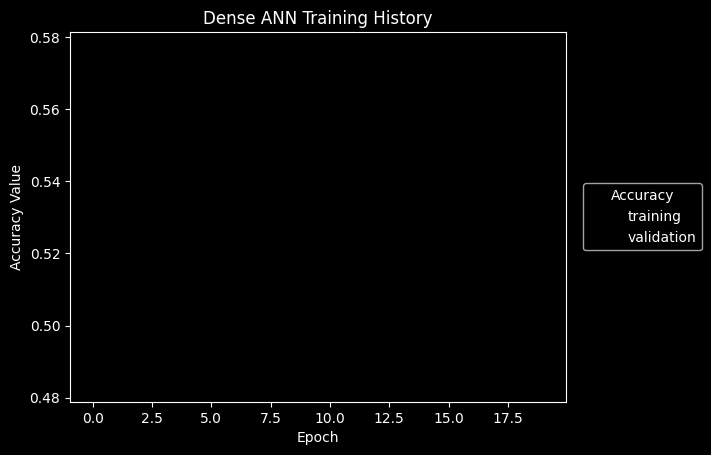

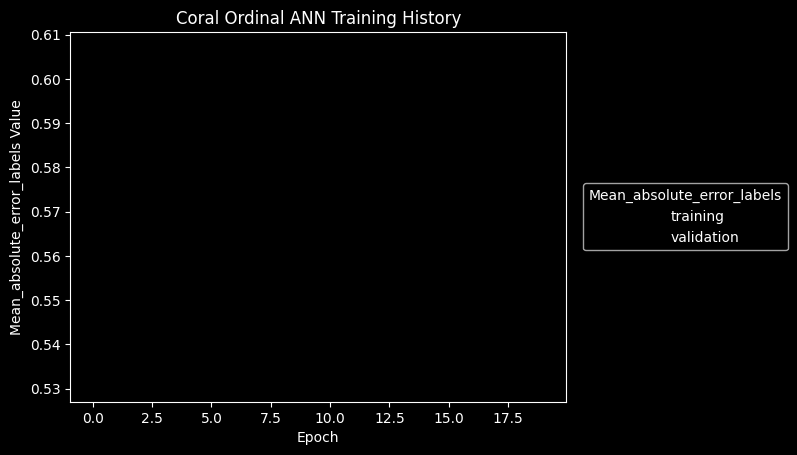

In [18]:
cmap = matplotlib.colormaps["Dark2"]


def plot_history_from_df_row(row):
    """Plot the history with the parameters from a row in a DataFrame"""
    plt.figure()
    plot_training_history(
        model=row["model"],
        history=row["history"],
        metric=row["metric"],
        training_options={"linestyle": "--", "color": cmap(row["i_color"])},
        validation_options={"color": cmap(row["i_color"])},
    )


models_df.apply(plot_history_from_df_row, axis=1)

# Conclusion
The applied ann do not provide better predictions than the conventional models from notebook 2.
It is noticeable that the training hardly provides any improvement over the different epochs,
as seen in the validation loss.